#Initialization

In [4]:
!pip install scikit-learn
!pip install pycountry
!pip install rapidfuzz
!pip install vaderSentiment
!pip install wordcloud

import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')  # for word_tokenize

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from rapidfuzz import process, fuzz
from rapidfuzz import fuzz, process
import matplotlib.pyplot as plt
import numpy as np
import pycountry
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import string
from wordcloud import WordCloud
import pandas as pd
from itertools import combinations
from collections import Counter
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px


stop_words = set(stopwords.words('english'))

analyzer = SentimentIntensityAnalyzer()








[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##Pre-analysis description

In [6]:
#import 2 notebooks "lululemon_tweets.csv" and 'adidas_tweets.csv"

# Import the lululemon data as a Pandas df
lulu_df = pd.read_csv("/content/lulu_tweets.csv")


# Display some info
lulu_df.info()

#Import the Adidas data as a Pandas df
adidas_df = pd.read_csv("/content/adidas_tweets.csv")
adidas_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6190 entries, 0 to 6189
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   created_at            6190 non-null   object
 1   id                    6190 non-null   int64 
 2   full_text             6190 non-null   object
 3   is_quote_status       6190 non-null   bool  
 4   retweet_count         6190 non-null   int64 
 5   favorite_count        6190 non-null   int64 
 6   user.id               6190 non-null   int64 
 7   user.name             6190 non-null   object
 8   user.screen_name      6190 non-null   object
 9   user.location         4477 non-null   object
 10  user.followers_count  6190 non-null   int64 
 11  user.friends_count    6190 non-null   int64 
 12  user.listed_count     6190 non-null   int64 
 13  user.verified         6190 non-null   bool  
 14  user.statuses_count   6190 non-null   int64 
dtypes: bool(2), int64(8), object(5)
memory

In [7]:
#display all of the column names for lululemon_df
lulu_df.columns


Index(['created_at', 'id', 'full_text', 'is_quote_status', 'retweet_count',
       'favorite_count', 'user.id', 'user.name', 'user.screen_name',
       'user.location', 'user.followers_count', 'user.friends_count',
       'user.listed_count', 'user.verified', 'user.statuses_count'],
      dtype='object')

In [8]:
#display all of the column names for nike_df
adidas_df.columns


Index(['created_at', 'id', 'full_text', 'is_quote_status', 'retweet_count',
       'favorite_count', 'user.id', 'user.name', 'user.screen_name',
       'user.location', 'user.followers_count', 'user.friends_count',
       'user.listed_count', 'user.verified', 'user.statuses_count'],
      dtype='object')

In [9]:
lulu_df.head(5)

created_at                   id  \
0  2021-10-01 11:45:57+00:00  1443905019309224000   
1  2021-10-01 11:58:05+00:00  1443908070506172400   
2  2021-10-01 09:58:19+00:00  1443877931722461200   
3  2021-10-01 14:01:03+00:00  1443939018366926800   
4  2021-10-01 13:44:13+00:00  1443934780949631000   

                                           full_text  is_quote_status  \
0  #FF @LauraMcInnes7 @lululemon @jeffieruth @col...            False   
1  @BillGarlandSpkr @LauraMcInnes7 @lululemon @je...            False   
2  RT @Mom_Junky: Leggings can be intimidating! I...            False   
3  @EMRAnswers @ShereeseMayMba @stacy_hurt @Hassa...            False   
4  @BillGarlandSpkr @LauraMcInnes7 @lululemon @je...            False   

   retweet_count  favorite_count              user.id          user.name  \
0              5              25           3006851958       Bill Garland   
1              0               9           4836304415         Coleen Lou   
2              5               0             59747580       Janice Brady   
3              0               2           2717607301        Janae Sharp   
4              0               7  1073715523483951100  I Own It Movement   

  user.screen_name                user.location  user.followers_count  \
0  BillGarlandSpkr  Albuquerque, New Mexico USA                 11863   
1       coleenlou1                 Georgia, USA                   820   
2         bjkbrady           Murrells Inlet, SC                 12655   
3     CoherenceMed                Charlotte, NC                 13553   
4   IOwnItMovement                San Diego, CA                  2609   

   user.friends_count  user.listed_count  user.verified  user.statuses_count  
0               11882                280          False                24995  
1                 648                 61          False                 2792  
2                4954               2810          False               618622  
3                7769                503          False                44212  
4                 694                 17          False                 7229

#Primary Analysis

##Quick Analysis of Raw Data

In [10]:
# rudimentary quantitiative analysis of the different features in lulu_df and adidas_df

# Check for missing values in both dataframes
print("Lululemon Missing Values:\n", lulu_df.isnull().sum())
print("\nAdidas Missing Values:\n", adidas_df.isnull().sum())

# Basic descriptive statistics for numerical features
print("\nLululemon Descriptive Statistics:\n", lulu_df.describe())
print("\nAdidas Descriptive Statistics:\n", adidas_df.describe())



Lululemon Missing Values:
 created_at                 0
id                         0
full_text                  0
is_quote_status            0
retweet_count              0
favorite_count             0
user.id                    0
user.name                  0
user.screen_name           0
user.location           1713
user.followers_count       0
user.friends_count         0
user.listed_count          0
user.verified              0
user.statuses_count        0
dtype: int64

Adidas Missing Values:
 created_at                  0
id                          0
full_text                   0
is_quote_status             0
retweet_count               0
favorite_count              0
user.id                     0
user.name                   0
user.screen_name            0
user.location           10434
user.followers_count        0
user.friends_count          0
user.listed_count           0
user.verified               0
user.statuses_count         0
dtype: int64

Lululemon Descriptive Statistics:
  

Important Notes:
- Adidas:
  -  38,212 total entries
  -  10,434 NA values for user.location
-Lulu :
  - 6,190 total entries
  - 1,713 NA values for user.location

##Cleaning the Data

In [11]:
#Fill in missing values in user.location with NA
lulu_df['user.location'] = lulu_df['user.location'].fillna('NA')
adidas_df['user.location'] = adidas_df['user.location'].fillna('NA')


No NA values in either dataset, clean

##Clean Text Removal
- remove stop words, emojis, and punctuation

In [12]:
# Function to remove stopwords, punctuation, and non-alphabetic features (emojis), text output is tokenized by word

def clean_text(text):
    if pd.isnull(text):  # handle NaNs
        return ''
    words = word_tokenize(text)  # tokenize the text
    filtered_words = [
        word for word in words
        if word.lower() not in stop_words and word.isalpha()
    ]
    return ' '.join(filtered_words)

#Apply to both datasets, creating 'cleaned_text' columns in each
lulu_df['cleaned_text'] = lulu_df['full_text'].apply(clean_text)
adidas_df['cleaned_text'] = adidas_df['full_text'].apply(clean_text)



We now have two columns, one with the original text "full_text" and one with the cleaned text "cleaned_text"

In [13]:
#show the words we just tokenized

# Or view a random sample
print(lulu_df[['full_text', 'cleaned_text']].sample(5))
print(adidas_df[['full_text', 'cleaned_text']].sample(5))



                                              full_text  \
4006  RT @blairbry: hello @Gymshark @Nike @adidas @U...   
4737  What made me insane this weekend:   - white wo...   
1150  @samanthalw_ @lululemon Check us out & dm us h...   
2188  RT @lululemon: Do your best today—whatever tha...   
4421  RT @lululemon: You're perfect as you are—and y...   

                                           cleaned_text  
4006  RT blairbry hello Gymshark Nike adidas UnderAr...  
4737  made insane weekend white women lululemon use ...  
1150  lululemon Check us dm us purchase special disc...  
2188                       RT lululemon best looks like  
4421              RT lululemon perfect plenty room grow  
                                               full_text  \
22684  @adidasoriginals @adidas are these still relea...   
6299              @AustinEkeler @adidas @adidasFballUS 9   
11278  RT @Xbox: Three icons: @adidas, Xbox, and you....   
27587  @themetav3rse @adidas @gmoneyNFT @BoredApeYC @... 

##Basic Descriptive Analysis
- number of tweets
  - number of unique tweets
- unique users
  - repeat users (maybe look for bots, potentially, and filter them out)
- tweet duplication or similarity (further weed out bot or bot-like behavior)
- date range
- Tweet frequency over time as a time series plot
  - daily or weekly tweet counts, depending on time frame
- Top hashtags for each brand
- Retweet and reply counts (is this available?)
- prevalance of mentions
  - word frequency

###Number of tweets and the number of unique tweets

In [14]:
# Number of tweets and unique tweeets

# Total number of tweets
num_lulu_tweets = len(lulu_df)
num_adidas_tweets = len(adidas_df)

# Number of unique tweets (based on cleaned text)
unique_lulu_tweets = lulu_df['cleaned_text'].nunique()
unique_adidas_tweets = adidas_df['cleaned_text'].nunique()

# Print results
print("Lululemon - Total tweets:", num_lulu_tweets)
print("Lululemon - Unique tweets:", unique_lulu_tweets)

print("Adidas - Total tweets:", num_adidas_tweets)
print("Adidas - Unique tweets:", unique_adidas_tweets)


Lululemon - Total tweets: 6190
Lululemon - Unique tweets: 4834
Adidas - Total tweets: 38212
Adidas - Unique tweets: 17525


Here we notice that Adidas has a much lower ratio of 'tweets to unique tweets' than Lululemon. This could indicate that there is bot content being pushed for Adidas, and we should further look into the contents of the tweets, especially that of Adidas.

Number of unique users, and the number of people who tweeted more than 10 times for each brand

In [15]:
#Number of unique users, and the number of people who tweeted more than 10 times for each brand

# Count unique users
unique_lulu_users = lulu_df['user.id'].nunique()
unique_adidas_users = adidas_df['user.id'].nunique()

# Count number of users with more than 10 tweets
lulu_user_counts = lulu_df['user.id'].value_counts()
adidas_user_counts = adidas_df['user.id'].value_counts()

lulu_users_10plus = (lulu_user_counts > 10).sum()
adidas_users_10plus = (adidas_user_counts > 10).sum()

# Print results
print("Lululemon - Unique users:", unique_lulu_users)
print("Lululemon - Users with >10 tweets:", lulu_users_10plus)

print("Adidas - Unique users:", unique_adidas_users)
print("Adidas - Users with >10 tweets:", adidas_users_10plus)


Lululemon - Unique users: 4463
Lululemon - Users with >10 tweets: 19
Adidas - Unique users: 29145
Adidas - Users with >10 tweets: 105


In [16]:
# Get users with more than 10 tweets
lulu_heavy_users = lulu_user_counts[lulu_user_counts > 10]
adidas_heavy_users = adidas_user_counts[adidas_user_counts > 10]

# Display the results
print("Lululemon - Users with >10 tweets:\n", lulu_heavy_users)
print("\nAdidas - Users with >10 tweets:\n", adidas_heavy_users)


Lululemon - Users with >10 tweets:
 user.id
215522693              32
24038731               31
1433123168126963700    24
145758982              23
881548979682422800     20
2435986713             20
4924926322             16
4527461435             16
127646057              14
1629244514             14
16033679               14
26439183               13
295070040              13
15791902               13
183675612              13
963863710346436600     12
25074102               11
17842565               11
1282178362732159000    11
Name: count, dtype: int64

Adidas - Users with >10 tweets:
 user.id
281283506              137
458036949              127
24852153               108
1086436967204700200     89
2347802995              68
                      ... 
440832678               11
23011345                11
37307228                11
22696979                11
24117639                11
Name: count, Length: 105, dtype: int64


###Lululemon High Tweet Customer Analysis

Here we are trying to look into these users with 'spammy' tendencies. Let's find out if they are bots, angry customers, etc

In [17]:
#analysis of tweets for cust.id '215522693' which is Lulu's number 1 tweeter

pd.set_option('display.max_colwidth', None)  # Show full content of each column


# Filter for the user
user_tweets = lulu_df[lulu_df['user.id'] == 215522693]

# Show the user's name and screen name (once)
print("User name:", user_tweets['user.name'].iloc[0])
print("Screen name:", user_tweets['user.screen_name'].iloc[0])

# Show each tweet's text and whether it is a quoted tweet
print(user_tweets[['full_text', 'is_quote_status']])



User name: Jim Ace
Screen name: JimAceman
                                                                                                                                                                                                                                                                                                         full_text  \
3382                                                                                                                                                                  RT @RAWitt2: .@lululemon @underarmour @athleta, which of you will be #climate #leaders by committing to ditch coal by 2030?   I support @st…   
3402                                                                                                                 .@lululemon #yoga #leggings are made with coal. #Coal has no place in our closets. Call Lulu at 877-263-9300 and sign @Stand.earth petition: https://t.co/Tux6OVprJ8. https://t.co/YizIfii7mC   
3403     @Yogis demand #Foss

In [18]:
#analysis of tweets for cust.id '24038731' which is Lulu's number 2 tweeter

pd.set_option('display.max_colwidth', None)  # Show full content of each column

# Filter for the user
user_tweets = lulu_df[lulu_df['user.id'] == 24038731]

# Show the user's name and screen name (once)
print("User name:", user_tweets['user.name'].iloc[0])
print("Screen name:", user_tweets['user.screen_name'].iloc[0])

# Show each tweet's text and whether it is a quoted tweet
print(user_tweets[['full_text', 'is_quote_status']])

User name: Matt Mulligan
Screen name: MattMully
                                                                                                                                                                                                                                                                                    full_text  \
4734                                                                                                                                      @lululemon Are there any plans to include other essential medical professionals that are vital to patient care? I.e. x-ray & respiratory techs, PAs   
4736   @lululemon I see the list of your First Responder discount excludes x-rays technologists. Disappointing. Most patients see the x-ray tech before the doctor and many times before the nurse. Techs x-ray dozens of patients including all covid patients throughout their entire shift   
4773                                   @lululemon  I've seen quite a few customer ser

In [19]:
#analysis of tweets for cust.id '1433123168126963700' which is Lulu's number 2 tweeter

pd.set_option('display.max_colwidth', None)  # Show full content of each column

# Filter for the user
user_tweets = lulu_df[lulu_df['user.id'] == 1433123168126963700]

# Show the user's name and screen name (once)
print("User name:", user_tweets['user.name'].iloc[0])
print("Screen name:", user_tweets['user.screen_name'].iloc[0])

# Show each tweet's text and whether it is a quoted tweet
print(user_tweets[['full_text', 'is_quote_status']])

User name: Kinseyfit
Screen name: kinseyfit
                                                                                                                                                                                                                                                                                            full_text  \
1076                                              @KylaMK @lululemon @lululemonTO have you tried Kinseyfit, same quality for a fraction of the cost and we promise you will instantly love, check us out we would give you a special discount code for your first purchase 🔥🔥 https://t.co/LfRrZ0Uyuf   
1077                                                           @juudyle @lululemon have you tried Kinseyfit, same quality for a fraction of the cost and we promise you will instantly love, check us out we would give you a special discount code for your first purchase 🔥🔥https://t.co/LfRrZ0Uyuf   
1078                                                        @kaay

###Adidas High Tweet Customer Analysis


In [20]:
#analysis of tweets for cust.id '281283506' which is Adida's number 1 tweeter

pd.set_option('display.max_colwidth', None)  # Show full content of each column

# Filter for the user
user_tweets = adidas_df[adidas_df['user.id'] == 281283506]

# Show the user's name and screen name (once)
print("User name:", user_tweets['user.name'].iloc[0])
print("Screen name:", user_tweets['user.screen_name'].iloc[0])

# Show each tweet's text and whether it is a quoted tweet
print(user_tweets[['full_text', 'is_quote_status']])

User name: La Revelacion
Screen name: BoysRevelacion
                                                                                                                                                                     full_text  \
1                                           SELENA boosted up Puma stocks by 40%  Her partnership helped Puma grow faster  than rivals @Adidas & @Nike https://t.co/uRKsuz32lj   
225                                         SELENA boosted up Puma stocks by 40%  Her partnership helped Puma grow faster  than rivals @Adidas & @Nike https://t.co/uRKsuz32lj   
277    Selena Gomez boosted up Puma stocks by 40% and her partnership helped Puma grow faster than  larger rivals  @Adidas  and  @nike   @selenagomez  https://t.co/uRKsuz32lj   
383                                         SELENA boosted up Puma stocks by 40%  Her partnership helped Puma grow faster  than rivals @Adidas & @Nike https://t.co/uRKsuz32lj   
486    Selena Gomez boosted up Puma stocks by 40% and her

In [21]:
#analysis of tweets for cust.id '458036949' which is Adida's number 1 tweeter

pd.set_option('display.max_colwidth', None)  # Show full content of each column

# Filter for the user
user_tweets = adidas_df[adidas_df['user.id'] == 458036949]

# Show the user's name and screen name (once)
print("User name:", user_tweets['user.name'].iloc[0])
print("Screen name:", user_tweets['user.screen_name'].iloc[0])

# Show each tweet's text and whether it is a quoted tweet
print(user_tweets[['full_text', 'is_quote_status']])

User name: AMZ
Screen name: zen_masstah
                                                                                                                                                                                                                                                                                                                                                                 full_text  \
23986                                                                                                                                                                                                                         RT @GENDERSWAGYOU: @attorneygeneral @amazonnews Attn Amazon Prime Customers - All @USPS & @adidas deliveries are being handed over to @Lase…   
24024                                                                                                                                                                               @ShaneseTweets @LaserShipAssist @Nike @nikesb @S

In [22]:
#analysis of tweets for cust.id '24852153' which is Adida's number 1 tweeter

pd.set_option('display.max_colwidth', None)  # Show full content of each column

# Filter for the user
user_tweets = adidas_df[adidas_df['user.id'] == 24852153]

# Show the user's name and screen name (once)
print("User name:", user_tweets['user.name'].iloc[0])
print("Screen name:", user_tweets['user.screen_name'].iloc[0])

# Show each tweet's text and whether it is a quoted tweet
print(user_tweets[['full_text', 'is_quote_status']])

User name: Le Prinzri 7 STAR
Screen name: bleustar9757
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        full_text  \
20103                                                                                                                                                                                                                                                                                                                       

In [23]:
#analysis of tweets for cust.id '1086436967204700200' which is Adida's number 1 tweeter

pd.set_option('display.max_colwidth', None)  # Show full content of each column

# Filter for the user
user_tweets = adidas_df[adidas_df['user.id'] == 1086436967204700200]

# Show the user's name and screen name (once)
print("User name:", user_tweets['user.name'].iloc[0])
print("Screen name:", user_tweets['user.screen_name'].iloc[0])

# Show each tweet's text and whether it is a quoted tweet
print(user_tweets[['full_text', 'is_quote_status']])

User name: Jajuan Michael Harley
Screen name: jajuanmharley
                                                                                                                                                                                                                    full_text  \
334    @NFL #nfl  @Nike #nike @adidas #adidas @Reebok #reebok @UnderArmour #underarmour @harleydavidson @Eastbay #eastbay #motivation @Gatorade #gatorade @POWERADE #powerade @MuscleMilk #musclemilk https://t.co/dcwziigS6c   
590    @NFL #nfl  @Nike #nike @adidas #adidas @Reebok #reebok @UnderArmour #underarmour @harleydavidson @Eastbay #eastbay #motivation @Gatorade #gatorade @POWERADE #powerade @MuscleMilk #musclemilk https://t.co/dcwziigS6c   
848    @NFL #nfl  @Nike #nike @adidas #adidas @Reebok #reebok @UnderArmour #underarmour @harleydavidson @Eastbay #eastbay #motivation @Gatorade #gatorade @POWERADE #powerade @MuscleMilk #musclemilk https://t.co/xVKg2rceU7   
957    @NFL #nfl  @Nike #nike @adidas #a

Looking at the tweets of the people who posted more than 10 times, here is what we found:

Lululemon:
- the person with the most Lululemon tweets had 32, and EVERY SINGLE ONE is anti-Lululemon. This person is calling for Lululemon to stop using coal in thier manufacturing process.

- the person with the 2nd most Lululemon tweets in also a complainer, they are complaining mainly about customer service issues and they are complaining about how Lululemon does not include X-ray technicians in their first responder discount

- the third person has an unusually long user.id, this might indicate a business account. This person has been promoting thier brand under users seemingly complaining about Adidas. These long customer ID's may be good to filter out. Will have to look more in to this.

Adidas:
- The largest tweeter for Adidas, with 137 is a spam account
- The second largest seems like a spam account that is complaining about a shipping company that Adidas does business with. Every single tweet is negative sentiment, but it does not really concern itself with Adidas. This user.id should not be included in sentiment analysis
- Third seems like a strange spam account with minimal words and lots of mentions
- 4th is a spam account, with a large User ID that is promoting or selling something


General:
- User ID's of length (18) are business accounts. User ID's of length (8) are regular users



###Lets create a 'filtered_adidas' and 'filtered_lulu' that has filtered out a bunch of the spam accounts (really only for adidas, since Lululemon has minimal spam)

This will get rid of users with over 35 tweets, users who tweeted the same thing at least 5 times, and then will get rid of all of the retweets and provide a cleaned up dataset to use in LDA to hopefully get better topics.

In [24]:
# Users with >35 tweets
adidas_spam_users_1 = adidas_df['user.id'].value_counts()[lambda x: x > 35].index
lulu_spam_users_1 = lulu_df['user.id'].value_counts()[lambda x: x > 35].index


In [25]:
#Finding users who have tweeted the same exact thing at least 5 times
# Group by user and full_text, then count duplicates
adidas_dupes = adidas_df.groupby(['user.id', 'full_text']).size().reset_index(name='count')
lulu_dupes = lulu_df.groupby(['user.id', 'full_text']).size().reset_index(name='count')

# Filter to only rows where the same tweet was posted 5+ times
adidas_spam_users_2 = adidas_dupes[adidas_dupes['count'] >= 5]['user.id'].unique()
lulu_spam_users_2 = lulu_dupes[lulu_dupes['count'] >= 5]['user.id'].unique()


In [26]:
# Combine both spam detection methods
adidas_spam_users = set(adidas_spam_users_1).union(set(adidas_spam_users_2))
lulu_spam_users = set(lulu_spam_users_1).union(set(lulu_spam_users_2))


In [27]:
filtered_adidas = adidas_df[~adidas_df['user.id'].isin(adidas_spam_users)].copy()
filtered_lulu = lulu_df[~lulu_df['user.id'].isin(lulu_spam_users)].copy()


In [28]:
def clean_for_topic_modeling(df):
    df = df.copy()

    # Step 1: Remove tweets containing 'rt' (case-insensitive)
    df = df[~df['full_text'].str.contains(r'\brt\b', case=False, regex=True)]

    # Step 2: Remove quote tweets
    df = df[df['is_quote_status'] == False]

    # Step 3: Remove exact duplicate tweets (keep the first)
    df = df.drop_duplicates(subset='full_text', keep='first')

    return df


In [29]:
filtered_adidas = clean_for_topic_modeling(filtered_adidas)
filtered_lulu = clean_for_topic_modeling(filtered_lulu)


In [30]:
print(f"Original Adidas tweets: {len(adidas_df)} → Filtered: {len(filtered_adidas)}")
print(f"Original Lululemon tweets: {len(lulu_df)} → Filtered: {len(filtered_lulu)}")


Original Adidas tweets: 38212 → Filtered: 19055
Original Lululemon tweets: 6190 → Filtered: 4591


In [31]:
# Get tweet counts per user
adidas_user_counts = adidas_df['user.id'].value_counts()
lulu_user_counts = lulu_df['user.id'].value_counts()

# How many Adidas users tweeted more than 35 times?
print("Adidas users with >35 tweets:", (adidas_user_counts > 35).sum())
print("Lululemon users with >35 tweets:", (lulu_user_counts > 35).sum())


Adidas users with >35 tweets: 9
Lululemon users with >35 tweets: 0


###Tweet duplication or similarity

In [32]:
#Look for exact duplicates

# Count duplicated tweets for Lululemon
lulu_duplicates = lulu_df['full_text'].duplicated().sum()

# Count duplicated tweets for Adidas
adidas_duplicates = adidas_df['full_text'].duplicated().sum()

# Print results
print(f"Lululemon - Exact duplicate tweets: {lulu_duplicates}")
print(f"Adidas - Exact duplicate tweets: {adidas_duplicates}")


Lululemon - Exact duplicate tweets: 978
Adidas - Exact duplicate tweets: 15910


In [33]:
# View duplicate tweets for Lululemon
lulu_dup_tweets = lulu_df[lulu_df['full_text'].duplicated(keep=False)]
print("Lululemon duplicate tweets:\n", lulu_dup_tweets[['user.id', 'full_text']])

# View duplicate tweets for Adidas
adidas_dup_tweets = adidas_df[adidas_df['full_text'].duplicated(keep=False)]
print("Adidas duplicate tweets:\n", adidas_dup_tweets[['user.id', 'full_text']])


Lululemon duplicate tweets:
          user.id  \
2       59747580   
10      91187588   
37      14402160   
45    4149208878   
50    4890403714   
...          ...   
5867   811885184   
5942   954200401   
5954    21077374   
5959  4090751903   
5975    24038731   

                                                                                                                                                                                                                                         full_text  
2                                                                                                     RT @Mom_Junky: Leggings can be intimidating! I’ve only purchased jackets and accessories from #lululemon. Shoutout to Shruthi @lululemon @D…  
10                            .@lululemon please make commitments to switch to renewable energy in your supply chain. Your our brand has scored a “D-” in https://t.co/3Tnn52vjgH’s Fossil-Free Fashion Scorecard for your sustainability effort

In [34]:
# Function to count fuzzy matches over a similarity threshold
def count_similar_tweets(df, threshold=90, sample_size=1000):
    tweets = df['cleaned_text'].dropna().unique()  # drop NaNs and deduplicate exact matches
    tweets = tweets[:sample_size]  # optional sample for speed

    similar_pairs = 0
    total_pairs = 0

    for t1, t2 in combinations(tweets, 2):
        total_pairs += 1
        score = fuzz.ratio(t1, t2)
        if score >= threshold:
            similar_pairs += 1

    return similar_pairs, total_pairs


In [35]:
lulu_similar, lulu_total = count_similar_tweets(lulu_df, threshold=80)
adidas_similar, adidas_total = count_similar_tweets(adidas_df, threshold=80)

print(f"Lululemon - Similar tweet pairs (≥90%): {lulu_similar} / {lulu_total}")
print(f"Adidas - Similar tweet pairs (≥90%): {adidas_similar} / {adidas_total}")

Lululemon - Similar tweet pairs (≥90%): 312 / 499500
Adidas - Similar tweet pairs (≥90%): 779 / 499500


In [36]:


def count_similar_tweets_fast(texts, threshold=90):
    # Drop nulls and exact duplicates first
    texts = pd.Series(texts).dropna().unique().tolist()

    # Compute similarity matrix (returns numpy array)
    similarity_matrix = process.cdist(texts, texts, scorer=fuzz.ratio)

    # Remove self-comparisons and count matches above threshold
    match_count = 0
    n = len(texts)
    for i in range(n):
        for j in range(i + 1, n):  # only upper triangle (i < j)
            if similarity_matrix[i][j] >= threshold:
                match_count += 1

    total_possible = n * (n - 1) // 2
    return match_count, total_possible


In [37]:
# Lululemon
lulu_similar, lulu_total = count_similar_tweets_fast(lulu_df['cleaned_text'])
print(f"Lululemon - Similar tweet pairs (≥90%): {lulu_similar} / {lulu_total}")

# Adidas
adidas_similar, adidas_total = count_similar_tweets_fast(adidas_df['cleaned_text'])
print(f"Adidas - Similar tweet pairs (≥90%): {adidas_similar} / {adidas_total}")


Lululemon - Similar tweet pairs (≥90%): 288 / 11681361
Adidas - Similar tweet pairs (≥90%): 6024 / 153554050


Bot Detection and flagging:

In [38]:
#Here we are flagging potential bots by looking at people who twwet the similar things multiple times thorughout the period
def flag_potential_bots(df, similarity_threshold=90, min_similar=5):
    potential_bots = []

    # Group tweets by user
    grouped = df.groupby('user.id')

    for user_id, group in grouped:
        tweets = group['full_text'].dropna().unique().tolist()

        if len(tweets) < 2:
            continue  # No pairs to compare

        similar_count = 0

        # Compare each tweet pair (within the user's tweets)
        for i in range(len(tweets)):
            for j in range(i + 1, len(tweets)):
                score = fuzz.ratio(tweets[i], tweets[j])
                if score >= similarity_threshold:
                    similar_count += 1

        if similar_count >= min_similar:
            potential_bots.append(user_id)

    return potential_bots


In [39]:
adidas_bots = flag_potential_bots(adidas_df, similarity_threshold=90, min_similar=5)
print(f"Number of potential Adidas bot users: {len(adidas_bots)}")


Number of potential Adidas bot users: 35


In [40]:
lulu_bots = flag_potential_bots(lulu_df, similarity_threshold=90, min_similar=5)
print(f"Number of potential Lululemon bot users: {len(lulu_bots)}")


Number of potential Lululemon bot users: 3


In [41]:
adidas_bot_tweets = adidas_df[adidas_df['user.id'].isin(adidas_bots)]
print(adidas_bot_tweets[['user.id', 'full_text']].head())


                 user.id  \
1              281283506   
213           3061104274   
225            281283506   
277            281283506   
334  1086436967204700200   

                                                                                                                                                                                                                                                                                 full_text  
1                                                                                                                                                       SELENA boosted up Puma stocks by 40%  Her partnership helped Puma grow faster  than rivals @Adidas & @Nike https://t.co/uRKsuz32lj  
213  This year, we've shown the possibilities of 3D printing with our partnerships with @hayabusacombat, @RawlingsSports and @adidas.   So we're excited to share that we've been nominated in the 2021 @3dprintindustry awards in 5 categories!  Vote for Carbon! ht

###Date Range

In [42]:
#converting 'created_at' to date_time for pandas
lulu_df['created_at'] = pd.to_datetime(lulu_df['created_at'])
adidas_df['created_at'] = pd.to_datetime(adidas_df['created_at'])


In [43]:
# Lululemon
lulu_start = lulu_df['created_at'].min()
lulu_end = lulu_df['created_at'].max()

# Adidas
adidas_start = adidas_df['created_at'].min()
adidas_end = adidas_df['created_at'].max()

# Print results
print("Lululemon tweet date range:", lulu_start, "to", lulu_end)
print("Adidas tweet date range:", adidas_start, "to", adidas_end)


Lululemon tweet date range: 2021-10-01 09:58:19+00:00 to 2022-01-01 05:29:34+00:00
Adidas tweet date range: 2021-10-01 07:00:16+00:00 to 2022-01-01 06:57:44+00:00


This indicates that we have 3 months of tweet data, and the range of tweets is from October 1st 2021 to January 1st, 2022

###Tweet frequency for each brand over the period

<Figure size 1400x600 with 0 Axes>

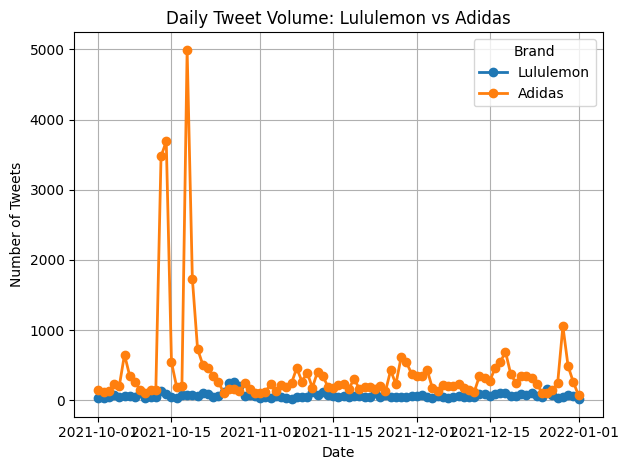

In [44]:

# Ensure created_at is datetime
lulu_df['created_at'] = pd.to_datetime(lulu_df['created_at'])
adidas_df['created_at'] = pd.to_datetime(adidas_df['created_at'])

# Create a date-only column
lulu_df['date'] = lulu_df['created_at'].dt.date
adidas_df['date'] = adidas_df['created_at'].dt.date

# Group by date and count tweets
lulu_daily = lulu_df.groupby('date').size().rename('Lululemon')
adidas_daily = adidas_df.groupby('date').size().rename('Adidas')

# Combine into one DataFrame
tweet_counts = pd.concat([lulu_daily, adidas_daily], axis=1).fillna(0)

# Plot
plt.figure(figsize=(14, 6))
tweet_counts.plot(kind='line', linewidth=2, marker='o')

plt.title('Daily Tweet Volume: Lululemon vs Adidas')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(title='Brand')
plt.grid(True)
plt.tight_layout()
plt.show()


There is a massive spike between october 12th and 23rd for Adidas. Let's see what that's all about

In [45]:
# Filter for tweets during the big Adidas spike
adidas_spike_df = adidas_df[
    (adidas_df['created_at'].dt.date >= pd.to_datetime('2021-10-12').date()) &
    (adidas_df['created_at'].dt.date <= pd.to_datetime('2021-10-23').date())
]


In [46]:
#Looking at tweets from adidas second spike
adidas_spike_2 = adidas_df[
    (adidas_df['created_at'].dt.date >= pd.to_datetime('2021-11-25').date()) &
    (adidas_df['created_at'].dt.date <= pd.to_datetime('2021-12-05').date())
]


In [47]:
#looking at tweets from adidas third spike
adidas_spike_3 = adidas_df[
    (adidas_df['created_at'].dt.date >= pd.to_datetime('2021-12-25').date()) &
    (adidas_df['created_at'].dt.date <= pd.to_datetime('2022-01-01').date())
]


In [48]:

stop_words = set(stopwords.words('english'))

def get_top_words(text_series, n=20):
    words = []
    for text in text_series.dropna():
        tokens = word_tokenize(text.lower())
        words.extend([
            word for word in tokens
            if word.isalpha() and word not in stop_words
        ])
    return Counter(words).most_common(n)


In [49]:
top_words_spike = get_top_words(adidas_spike_3['full_text'])

print(" Top words in Adidas spike period (Oct 12–23):")
for word, count in top_words_spike:
    print(f"{word}: {count}")


 Top words in Adidas spike period (Oct 12–23):
adidas: 2495
https: 1436
rt: 1081
impossibleisnothing: 847
generation: 846
inspire: 834
maybes: 828
donovan: 822
mitchell: 815
chose: 811
listen: 806
nike: 212
adidasoriginals: 120
igaacoach: 111
like: 89
spidadmitchell: 82
new: 78
x: 78
get: 71
got: 66


In [50]:
# Sort by tweet volume if you have a 'retweet_count' column
if 'retweet_count' in adidas_spike_df.columns:
    top_retweeted = adidas_spike_df.sort_values(by='retweet_count', ascending=False).head(10)
    print("\n Top retweeted Adidas tweets from spike:")
    print(top_retweeted[['full_text', 'retweet_count']])
else:
    # Just show most frequent duplicate tweets
    most_common = adidas_spike_df['full_text'].value_counts().head(10)
    print("\n Most common Adidas tweets during spike:")
    print(most_common)



 Top retweeted Adidas tweets from spike:
                                                                                                                                          full_text  \
19483  RT @Xbox: Three icons: @adidas, Xbox, and you.  Follow & RT with #XboxSweepstakes for a chance to win this exclusive kit including the Xbox…   
19476  RT @Xbox: Three icons: @adidas, Xbox, and you.  Follow & RT with #XboxSweepstakes for a chance to win this exclusive kit including the Xbox…   
19471  RT @Xbox: Three icons: @adidas, Xbox, and you.  Follow & RT with #XboxSweepstakes for a chance to win this exclusive kit including the Xbox…   
19470  RT @Xbox: Three icons: @adidas, Xbox, and you.  Follow & RT with #XboxSweepstakes for a chance to win this exclusive kit including the Xbox…   
19460  RT @Xbox: Three icons: @adidas, Xbox, and you.  Follow & RT with #XboxSweepstakes for a chance to win this exclusive kit including the Xbox…   
19441  RT @Xbox: Three icons: @adidas, Xbox, and you

There seems to have been a sweepstakes for Xbox that was being run by adidas. We may want to get rid of these tweets in our deep analysis.

###Top hastags for each brand

In [51]:
#gathering the top hashtags from each brand by looking at words that follow the # symbol in the full text

def extract_hashtags_regex(text_series):
    hashtags = []
    for text in text_series.dropna():
        hashtags.extend(re.findall(r"#\w+", text.lower()))
    return Counter(hashtags).most_common(10)



In [52]:
top_hashtags_lulu = extract_hashtags_regex(lulu_df['full_text'])
top_hashtags_adidas = extract_hashtags_regex(adidas_df['full_text'])

print(" Top 10 Lululemon Hashtags:")
for tag, count in top_hashtags_lulu:
    print(f"{tag}: {count}")

print("\n Top 10 Adidas Hashtags:")
for tag, count in top_hashtags_adidas:
    print(f"{tag}: {count}")



 Top 10 Lululemon Hashtags:
#thesweatlife: 113
#lululemoncoalprit: 71
#12daysofcheckout: 68
#fossilfreefashion: 65
#lululemon: 64
#coalsweats: 61
#teamcanada: 44
#yoga: 33
#fitness: 19
#beijing2022: 18

 Top 10 Adidas Hashtags:
#xboxsweepstakes: 7147
#impossibleisnothing: 1168
#adidas: 694
#xbox20: 482
#giveaway: 410
#running: 405
#runningshoes: 399
#nft: 178
#boltup: 169
#metaverse: 163


###Retweet and Favorite Counts

In [53]:
def summarize_engagement(df, brand_name):
    print(f"\n {brand_name} - Retweet & Favorite Summary Stats")

    for metric in ['retweet_count', 'favorite_count']:
        print(f"\n {metric.upper()}")
        print("Mean:", df[metric].mean())
        print("Median:", df[metric].median())
        print("Std Dev:", df[metric].std())
        print("Max:", df[metric].max())
        print("Min:", df[metric].min())
        print("IQR:", df[metric].quantile(0.75) - df[metric].quantile(0.25))


In [54]:
summarize_engagement(adidas_df, "Adidas")
summarize_engagement(lulu_df, "Lululemon")



 Adidas - Retweet & Favorite Summary Stats

 RETWEET_COUNT
Mean: 3323.464539935099
Median: 0.0
Std Dev: 7192.322618772755
Max: 19396
Min: 0
IQR: 149.0

 FAVORITE_COUNT
Mean: 3.9438919711085525
Median: 0.0
Std Dev: 155.35427383630838
Max: 21965
Min: 0
IQR: 0.0

 Lululemon - Retweet & Favorite Summary Stats

 RETWEET_COUNT
Mean: 13.782067851373183
Median: 0.0
Std Dev: 46.05521742553417
Max: 1791
Min: 0
IQR: 1.0

 FAVORITE_COUNT
Mean: 2.277059773828756
Median: 0.0
Std Dev: 21.826679019682246
Max: 1033
Min: 0
IQR: 1.0


###Engagement Analysis

In [55]:
#Here we are looking at the number of favorites and retweets to quantify 'engagement'


def analyze_engagement(df, brand_name):
    print(f"\n {brand_name} Engagement Analysis")

    # 1. Engagement rate
    df['engagement'] = df['retweet_count'] + df['favorite_count']
    avg_engagement = df['engagement'].mean()
    print(f"\n Average engagement per tweet: {avg_engagement:.2f}")

    # 2. Top tweets by retweets and favorites
    top_retweets = df.sort_values(by='retweet_count', ascending=False).head(10)
    top_favorites = df.sort_values(by='favorite_count', ascending=False).head(10)

    print("\n Top 10 Tweets by Retweets:")
    print(top_retweets[['full_text', 'retweet_count']])

    print("\n Top 10 Tweets by Favorites:")
    print(top_favorites[['full_text', 'favorite_count']])

    # 3. Distribution plots
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.hist(df['retweet_count'], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'{brand_name} - Retweet Count Distribution')
    plt.xlabel('Retweets')
    plt.ylabel('Number of Tweets')
    plt.xlim(left=0)

    plt.subplot(1, 2, 2)
    plt.hist(df['favorite_count'], bins=50, color='salmon', edgecolor='black')
    plt.title(f'{brand_name} - Favorite Count Distribution')
    plt.xlabel('Favorites')
    plt.ylabel('Number of Tweets')
    plt.xlim(left=0)

    plt.tight_layout()
    plt.show()



 Adidas Engagement Analysis

 Average engagement per tweet: 3327.41

 Top 10 Tweets by Retweets:
                                                                                                                                          full_text  \
15704  RT @Xbox: Three icons: @adidas, Xbox, and you.  Follow & RT with #XboxSweepstakes for a chance to win this exclusive kit including the Xbox…   
15703  RT @Xbox: Three icons: @adidas, Xbox, and you.  Follow & RT with #XboxSweepstakes for a chance to win this exclusive kit including the Xbox…   
15707  RT @Xbox: Three icons: @adidas, Xbox, and you.  Follow & RT with #XboxSweepstakes for a chance to win this exclusive kit including the Xbox…   
15708  RT @Xbox: Three icons: @adidas, Xbox, and you.  Follow & RT with #XboxSweepstakes for a chance to win this exclusive kit including the Xbox…   
15709  RT @Xbox: Three icons: @adidas, Xbox, and you.  Follow & RT with #XboxSweepstakes for a chance to win this exclusive kit including the Xbox…

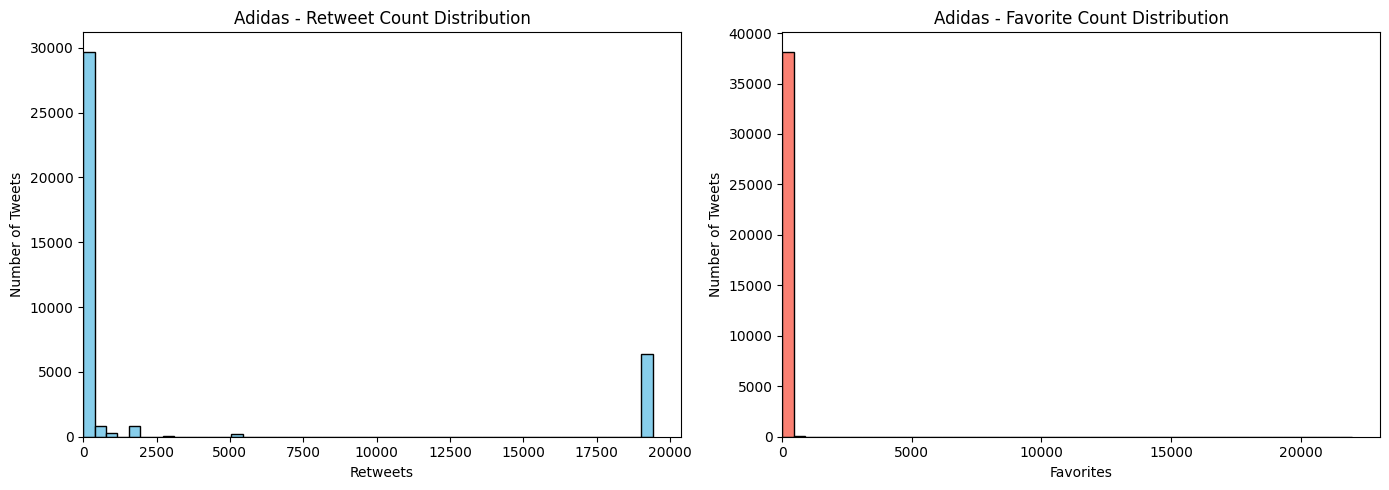


 Lululemon Engagement Analysis

 Average engagement per tweet: 16.06

 Top 10 Tweets by Retweets:
                                                                                                                                         full_text  \
838                                                                      RT @lululemon: It's always "wyd" never "what do you want from lululemon?"   
718   RT @wildingpaulaa: .@lululemon I went to your store and was told that I do not qualify for the Healthcare discount after presenting my hosp…   
888                                                                                          RT @lululemon: Today's mantra: I deserve good things.   
342                                                                                    RT @lululemon: Hey you. We’re proud of how far you’ve come.   
3943  RT @standearth: The word on the street is @lululemon is a coalprit. Making yoga pants in coal-powered factories doesn’t sound very health c…   
4

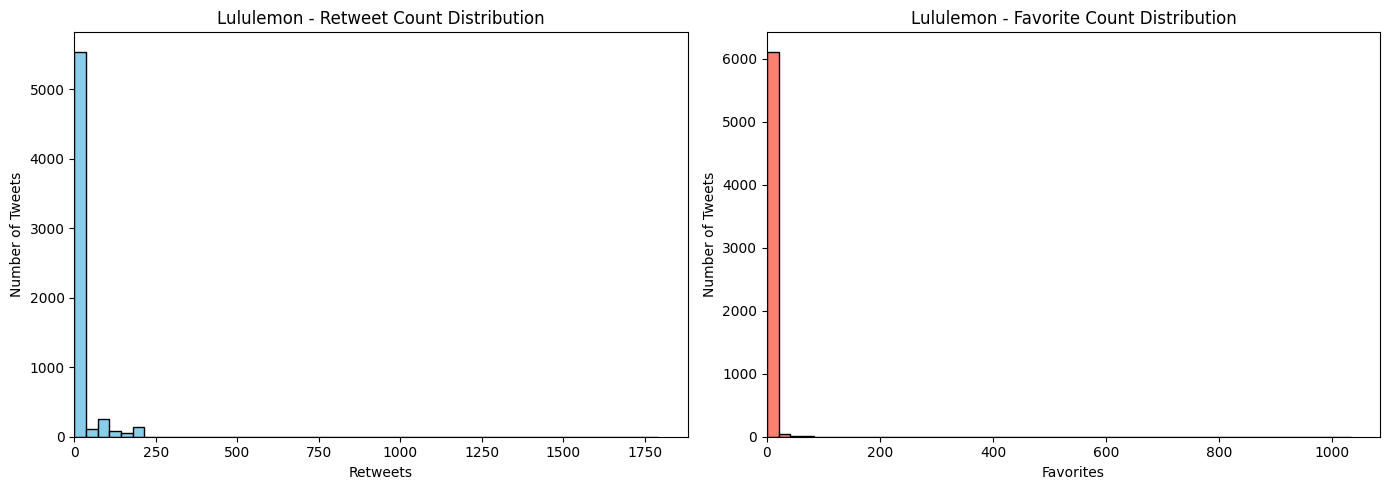

In [56]:
analyze_engagement(adidas_df, "Adidas")
analyze_engagement(lulu_df, "Lululemon")


I think the most important thing to glean from this engagement analysis is the most popular tweets from both brands in terms of engagement.

##Mentions and word frequency

In [57]:
#We are looking at who was mentioned the most (the most common words to follow the @ symbol) and what words were used most frequently

def analyze_mentions_and_words(df, brand_name, top_n=10):
    print(f"\n {brand_name} - Mentions and Word Frequency")

    mentions = []
    words = []

    for text in df['full_text'].dropna():
        # Extract mentions using regex
        mentions.extend(re.findall(r'@\w+', text.lower()))

        # Tokenize words
        tokens = word_tokenize(text.lower())
        words.extend([
            word for word in tokens
            if word.isalpha() and word not in stop_words
        ])

    # Count mentions and words
    mention_counts = Counter(mentions)
    word_counts = Counter(words)

    # Prevalence
    num_with_mentions = df['full_text'].str.contains(r'@\w+', regex=True).sum()
    print(f"\n Tweets with @mentions: {num_with_mentions} / {len(df)}")

    print(f"\n Top {top_n} Mentions:")
    for handle, count in mention_counts.most_common(top_n):
        print(f"{handle}: {count}")

    print(f"\n Top {top_n} Words:")
    for word, count in word_counts.most_common(top_n):
        print(f"{word}: {count}")


In [58]:
analyze_mentions_and_words(adidas_df, "Adidas")
analyze_mentions_and_words(lulu_df, "Lululemon")



 Adidas - Mentions and Word Frequency

 Tweets with @mentions: 38158 / 38212

 Top 10 Mentions:
@adidas: 36799
@xbox: 8775
@austinekeler: 7568
@adidasfballus: 7282
@nike: 2946
@adidasoriginals: 2597
@hyperkin: 1099
@boredapeyc: 1005
@statefarm: 561
@adidashoops: 493

 Top 10 Words:
adidas: 38957
rt: 20637
xbox: 15592
https: 10580
austinekeler: 7568
adidasfballus: 7282
xboxsweepstakes: 7148
win: 7063
chance: 6612
follow: 6530

 Lululemon - Mentions and Word Frequency

 Tweets with @mentions: 6181 / 6190

 Top 10 Mentions:
@lululemon: 6296
@teamcanada: 300
@fast: 146
@nike: 115
@standearth: 108
@calvinmcdonald: 96
@hockeynight: 80
@deezefi: 79
@devin_heroux: 74
@target: 64

 Top 10 Words:
lululemon: 6528
https: 1701
rt: 1366
get: 370
like: 345
teamcanada: 342
discount: 305
today: 280
coal: 267
new: 251


#Secondary Analysis

##Core Analytics

###word clouds

In [59]:


def generate_filtered_wordcloud(df, brand_name, extra_stopwords=None):
    if extra_stopwords is None:
        extra_stopwords = []

    # Combine default and extra stopwords
    custom_stopwords = set(stopwords.words('english')).union(extra_stopwords)

    # Join all cleaned text into one string
    text = " ".join(df['cleaned_text'].dropna().astype(str).str.lower())

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=custom_stopwords,
        max_words=200
    ).generate(text)

    # Plot
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{brand_name} Word Cloud", fontsize=16)
    plt.show()



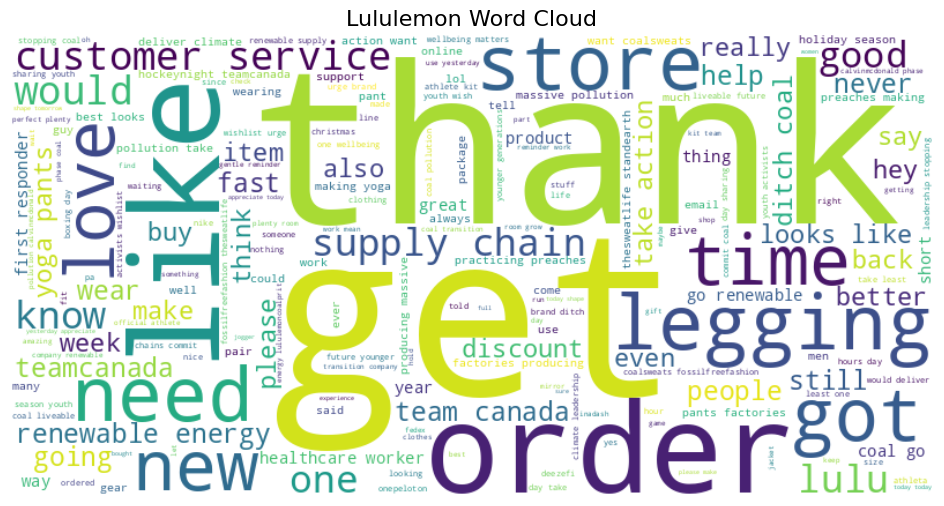

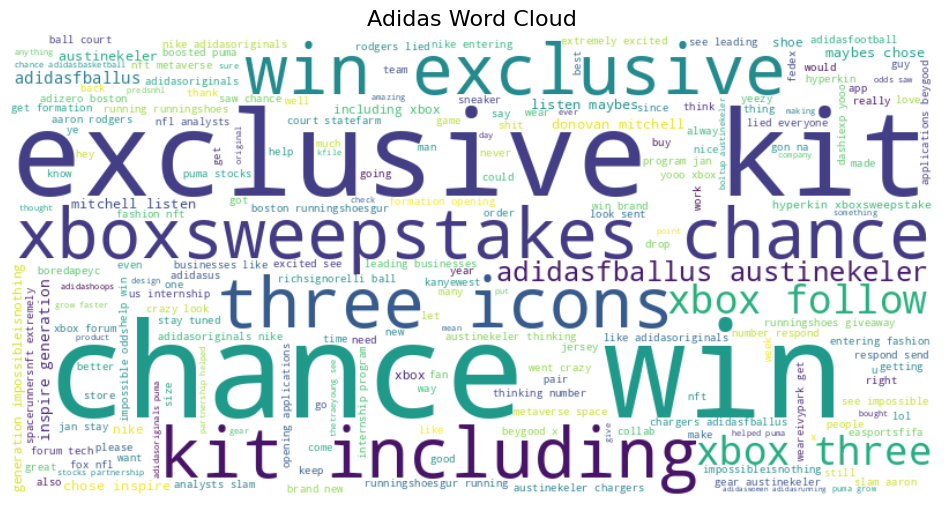

In [60]:
custom_words = {'lululemon', 'adidas', 'https', 'rt'}

generate_filtered_wordcloud(lulu_df, "Lululemon", extra_stopwords=custom_words)
generate_filtered_wordcloud(adidas_df, "Adidas", extra_stopwords=custom_words)


###n-gram frequency

In [61]:
#Here we are using ngram frequency to find the most commonly strung together words

def get_top_ngrams(df, ngram_range=(2, 2), top_n=20):
    # Drop nulls and lowercase text
    texts = df['cleaned_text'].dropna().str.lower().tolist()

    # Define CountVectorizer for n-grams
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vec.fit_transform(texts)

    # Sum across all rows to get total counts
    total_counts = X.sum(axis=0)
    ngram_freq = [(ngram, total_counts[0, idx]) for ngram, idx in vec.vocabulary_.items()]
    ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)

    return ngram_freq[:top_n]


In [62]:
print(" Top 2-grams - Lululemon")
print(get_top_ngrams(lulu_df, ngram_range=(2, 2)))

print("\n Top 3-grams - Lululemon")
print(get_top_ngrams(lulu_df, ngram_range=(3, 3)))

print("\n Top 2-grams - Adidas")
print(get_top_ngrams(adidas_df, ngram_range=(2, 2)))

print("\n Top 3-grams - Adidas")
print(get_top_ngrams(adidas_df, ngram_range=(3, 3)))


 Top 2-grams - Lululemon
[('rt lululemon', np.int64(632)), ('lululemon https', np.int64(245)), ('customer service', np.int64(126)), ('teamcanada lululemon', np.int64(123)), ('lululemon teamcanada', np.int64(110)), ('renewable energy', np.int64(109)), ('team canada', np.int64(106)), ('looks like', np.int64(86)), ('lululemon best', np.int64(83)), ('yoga pants', np.int64(82)), ('ditch coal', np.int64(82)), ('coal renewable', np.int64(77)), ('https https', np.int64(75)), ('hey lululemon', np.int64(73)), ('lululemoncoalprit https', np.int64(71)), ('hockeynight teamcanada', np.int64(70)), ('deliver climate', np.int64(70)), ('deezefi lululemon', np.int64(69)), ('fast lululemon', np.int64(67)), ('supply chain', np.int64(63))]

 Top 3-grams - Lululemon
[('ditch coal renewable', np.int64(77)), ('hockeynight teamcanada lululemon', np.int64(70)), ('rt lululemon best', np.int64(63)), ('yoga pants factories', np.int64(62)), ('lululemon best looks', np.int64(62)), ('best looks like', np.int64(62)), (

##Topic Modeling

In [63]:
#LDA Topic Modeling

def run_topic_modeling(df, brand_name, num_topics=5, num_words=10, custom_stopwords=None):
    print(f"\n {brand_name} - Improved Topic Modeling")

    if custom_stopwords is None:
        custom_stopwords = set()

    texts = df['cleaned_text'].dropna().str.lower().tolist()

    # Merge custom + default stopwords
    from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
    all_stopwords = set(ENGLISH_STOP_WORDS).union(custom_stopwords)

    # Use TF-IDF with min_df to remove rare junk terms
    vectorizer = TfidfVectorizer(stop_words=list(all_stopwords), min_df=5, max_df=0.95)
    X = vectorizer.fit_transform(texts)

    # Tighter LDA priors for short texts
    lda = LatentDirichletAllocation(
        n_components=num_topics,
        doc_topic_prior=0.1,      # alpha
        topic_word_prior=0.01,    # beta
        random_state=42
    )
    lda.fit(X)

    feature_names = vectorizer.get_feature_names_out()

    for idx, topic in enumerate(lda.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        print(f"\n Topic {idx + 1}: {' | '.join(top_words)}")




In [64]:
custom_stopwords = {'https', 'rt', 'lululemon', 'adidas'}

run_topic_modeling(filtered_lulu, "Lululemon", num_topics=5, custom_stopwords=custom_stopwords)
run_topic_modeling(filtered_adidas, "Adidas", num_topics=5, custom_stopwords=custom_stopwords)




 Lululemon - Improved Topic Modeling

 Topic 1: coal | youth | renewable | onepeloton | urge | future | season | company | calvinmcdonald | day

 Topic 2: pants | thank | good | got | wear | lulu | abc | like | new | need

 Topic 3: discount | healthcare | yoga | want | making | standearth | action | thesweatlife | lululemonuk | pants

 Topic 4: leggings | love | orthokimchipac | store | align | like | great | know | mirror | lulu

 Topic 5: teamcanada | fast | order | customer | service | hockeynight | like | help | target | amazon

 Adidas - Improved Topic Modeling

 Topic 1: xbox | hyperkin | xboxsweepstakes | win | brand | new | igaacoach | giveaway | running | runningshoesgur

 Topic 2: adidasoriginals | boredapeyc | nike | adidashockey | nhl | love | njdevils | lfc | weareivypark | beyonce

 Topic 3: austinekeler | adidasfballus | chargers | boltup | number | fraserspubaa | irainannarbor | let | fantasy | mvictors

 Topic 4: nike | xbox | sneakeradmirals | kanyewest | dashiexp |

Visualizing the Topic Modeling

In [65]:
def run_lda_model(df, num_topics=5, custom_stopwords=None):
    if custom_stopwords is None:
        custom_stopwords = set()

    texts = df['cleaned_text'].dropna().str.lower().tolist()

    from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
    all_stopwords = set(ENGLISH_STOP_WORDS).union(custom_stopwords)

    vectorizer = CountVectorizer(stop_words=list(all_stopwords))
    X = vectorizer.fit_transform(texts)

    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(X)

    return lda_model, vectorizer


In [66]:
def plot_topic_wordclouds(lda_model, vectorizer, num_words=30):
    feature_names = vectorizer.get_feature_names_out()

    for topic_idx, topic in enumerate(lda_model.components_):
        top_indices = topic.argsort()[-num_words:]
        top_words = {feature_names[i]: topic[i] for i in top_indices}

        wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words)

        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"🔹 Topic {topic_idx + 1} Word Cloud")
        plt.tight_layout()
        plt.show()

def plot_topic_words_bar(lda_model, vectorizer, num_words=30):
    """
    Plots the top words for each topic as a bar chart.

    Args:
        lda_model: The fitted LDA model.
        vectorizer: The CountVectorizer used to create the document-term matrix.
        num_words: The number of top words to display for each topic.
    """
    feature_names = vectorizer.get_feature_names_out()

    for topic_idx, topic in enumerate(lda_model.components_):
        top_indices = topic.argsort()[-num_words:]
        top_words = [feature_names[i] for i in top_indices]
        top_word_probs = [topic[i] for i in top_indices]

        plt.figure(figsize=(10, 5))
        plt.barh(range(num_words), top_word_probs, align='center')
        plt.yticks(range(num_words), top_words)
        plt.xlabel("Probability")
        plt.ylabel("Word")
        plt.title(f"🔹 Topic {topic_idx + 1} Top Words")
        plt.tight_layout()
        plt.show()



<ipython-input-66-975860b0fb7b>:39: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


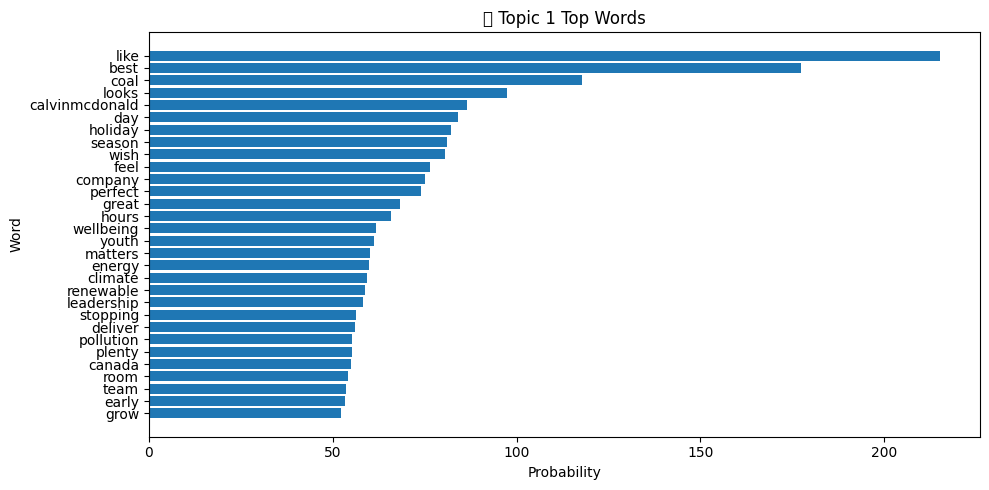

<ipython-input-66-975860b0fb7b>:39: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


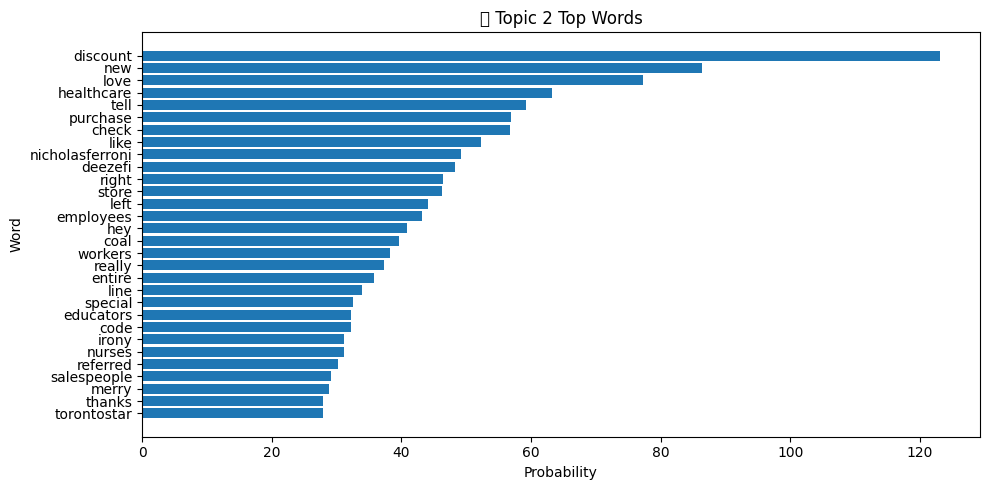

<ipython-input-66-975860b0fb7b>:39: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


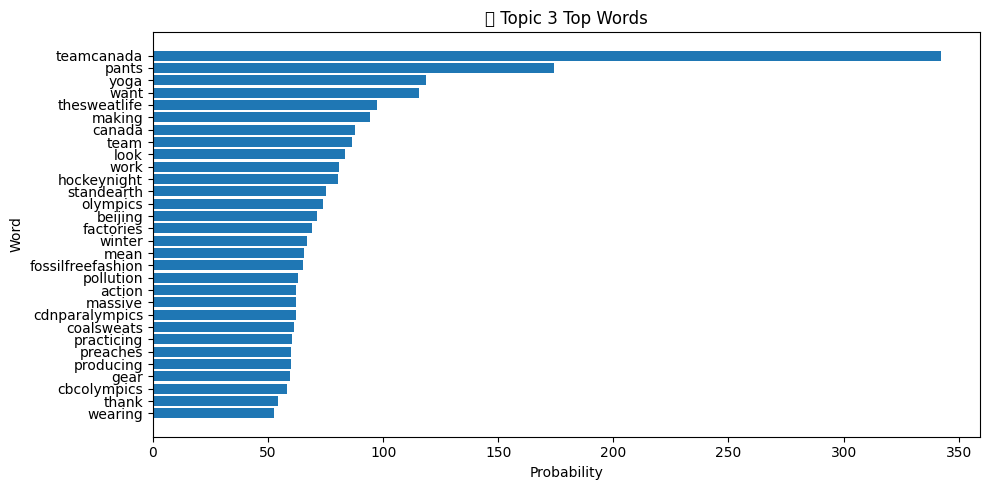

<ipython-input-66-975860b0fb7b>:39: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


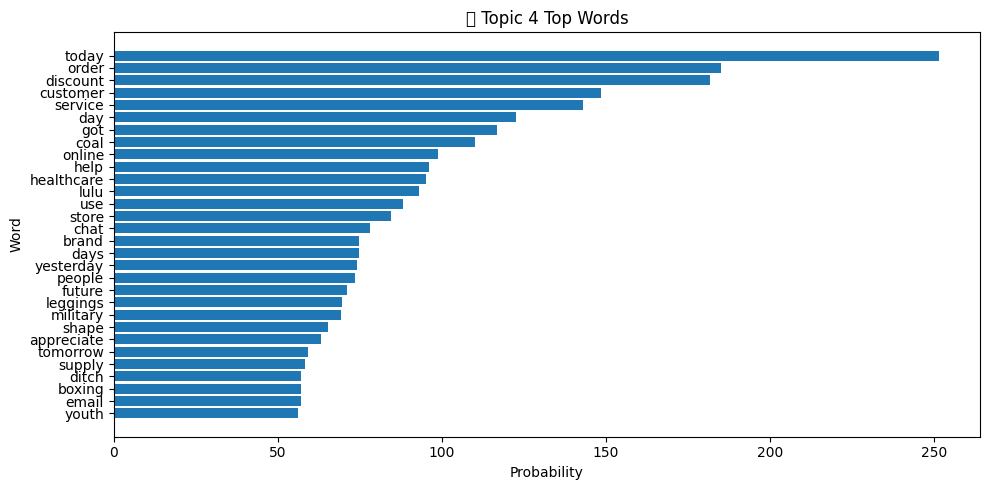

<ipython-input-66-975860b0fb7b>:39: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


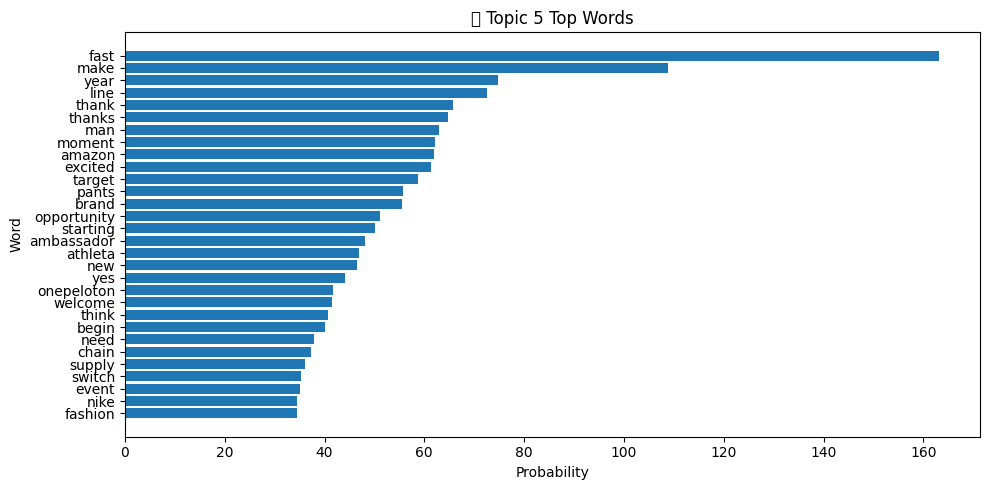

<ipython-input-66-975860b0fb7b>:14: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


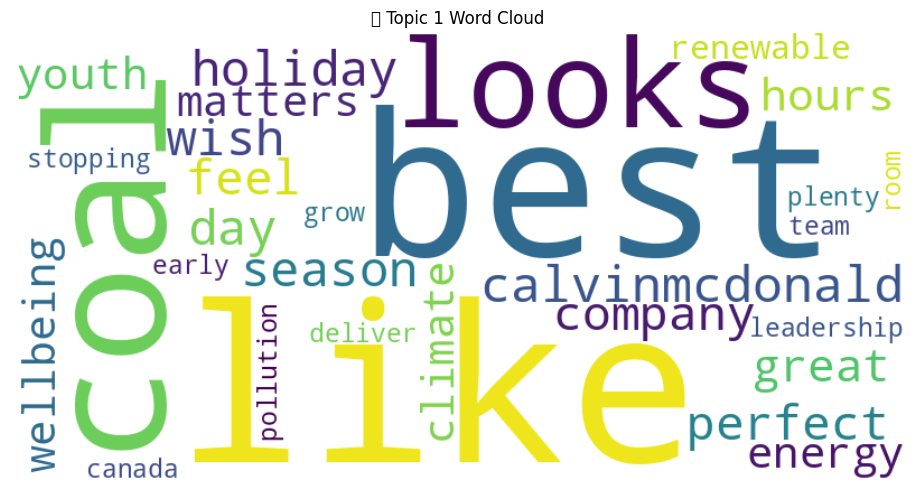

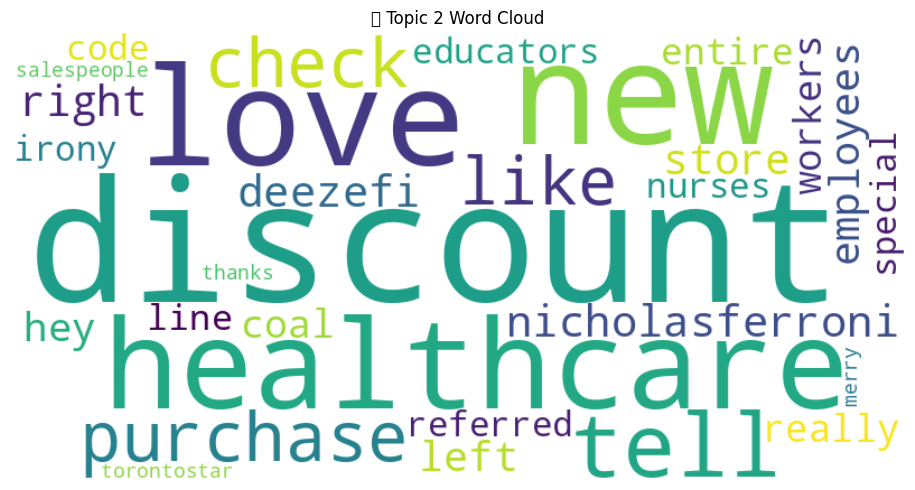

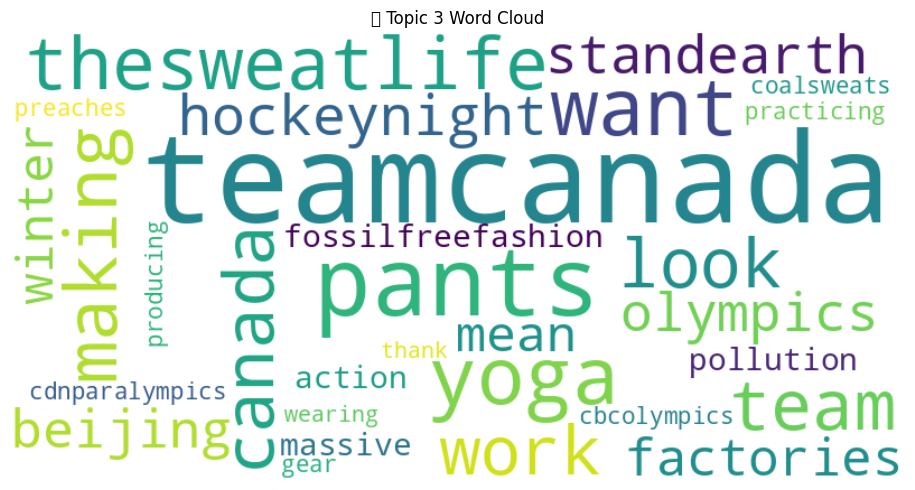

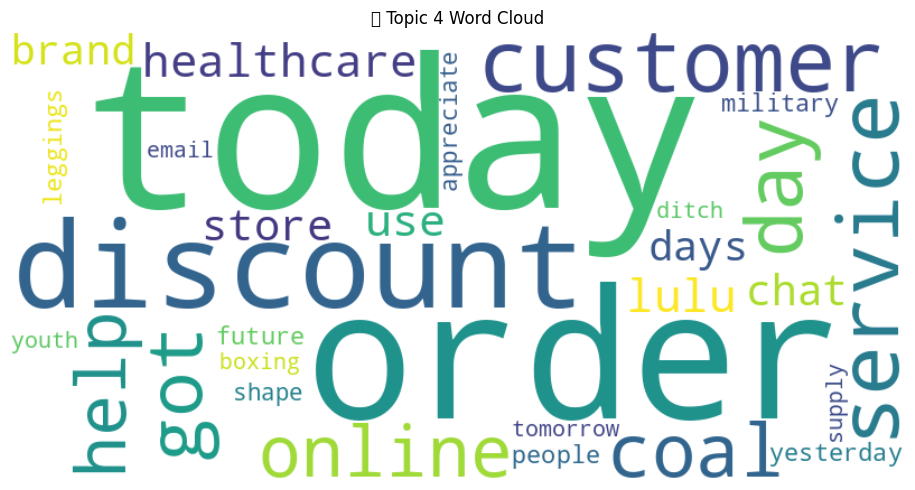

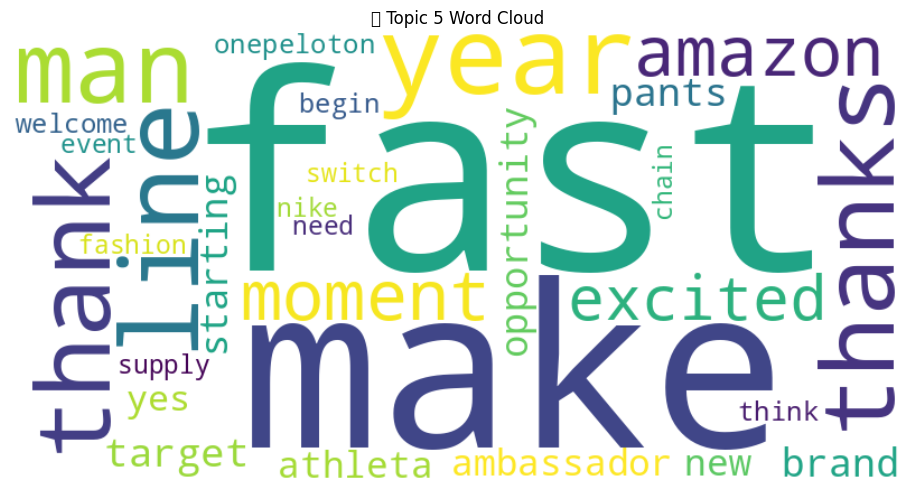

<ipython-input-66-975860b0fb7b>:39: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


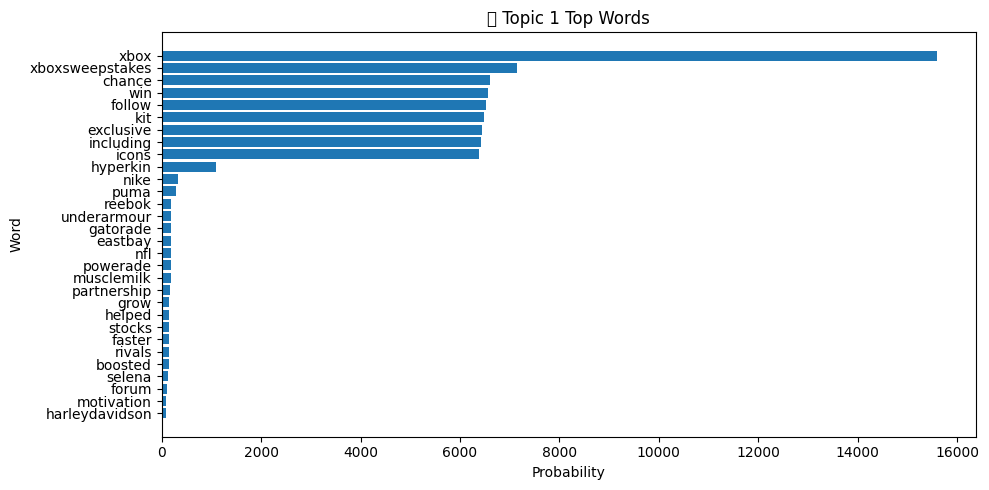

<ipython-input-66-975860b0fb7b>:39: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


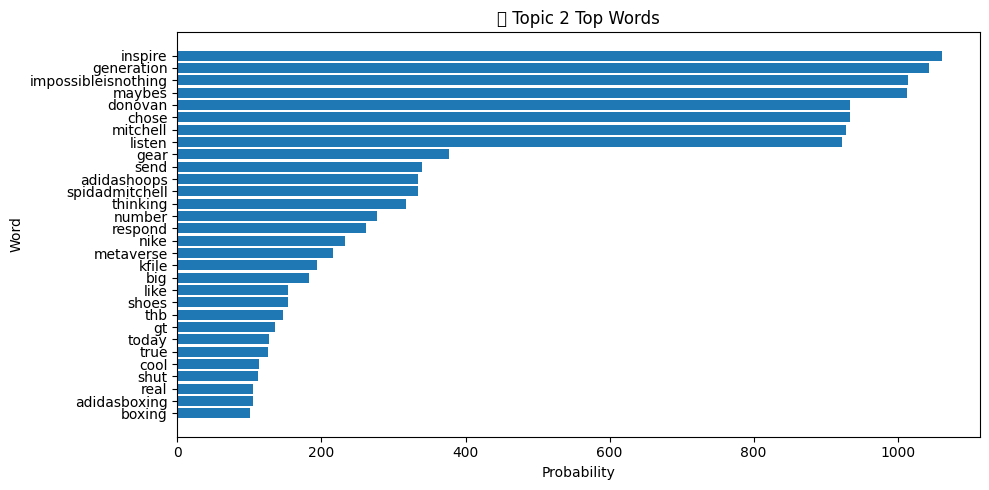

<ipython-input-66-975860b0fb7b>:39: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


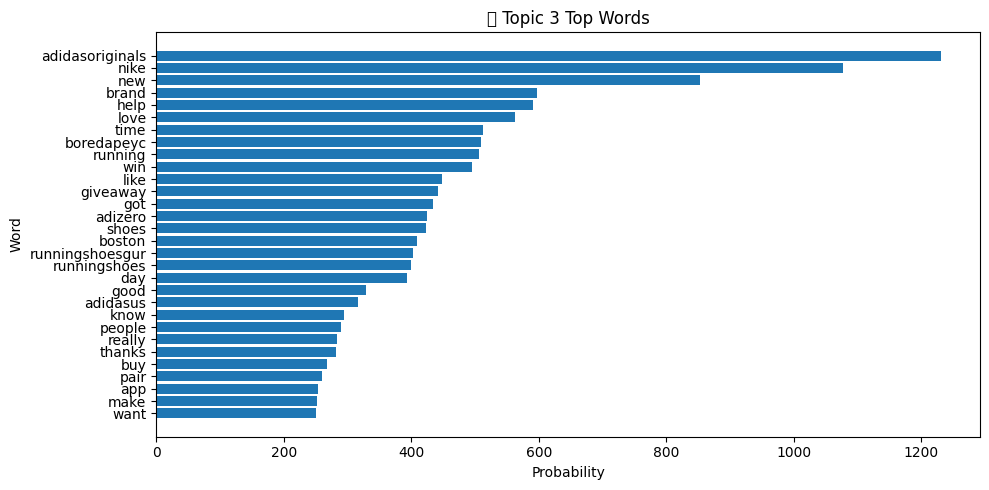

<ipython-input-66-975860b0fb7b>:39: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


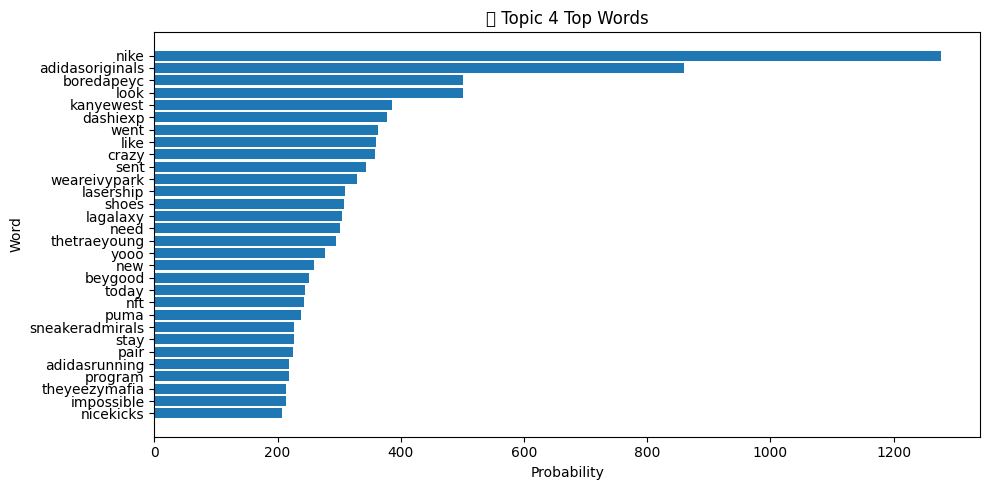

<ipython-input-66-975860b0fb7b>:39: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


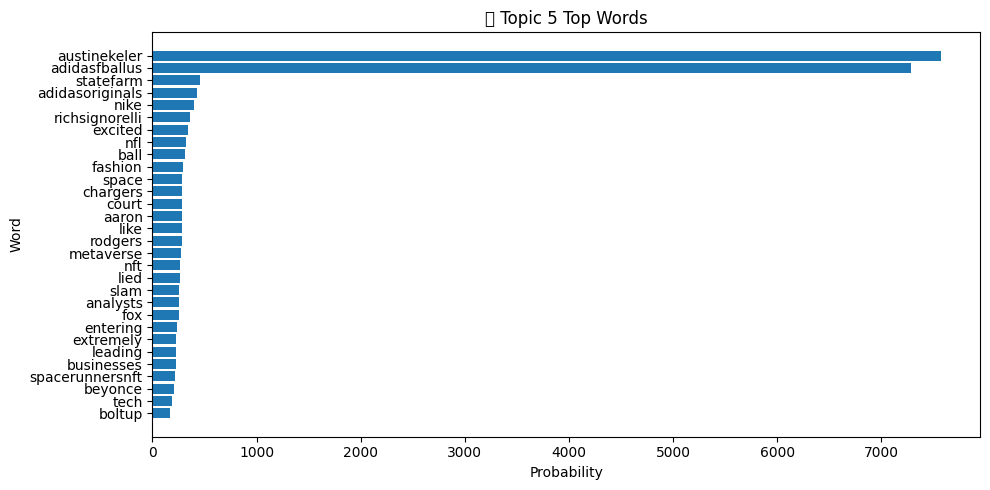

<ipython-input-66-975860b0fb7b>:14: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


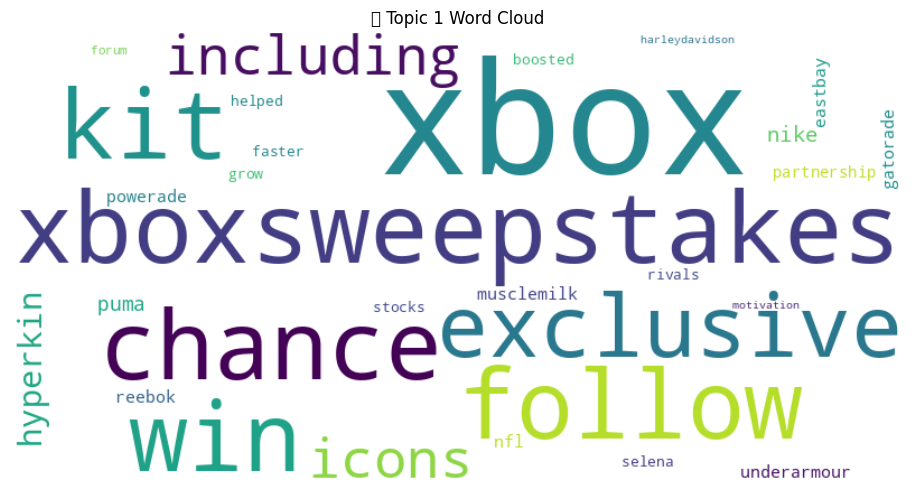

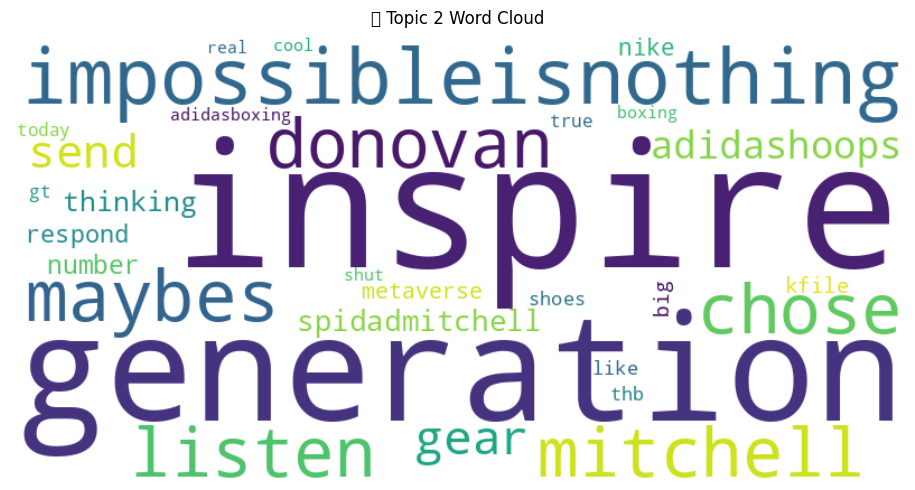

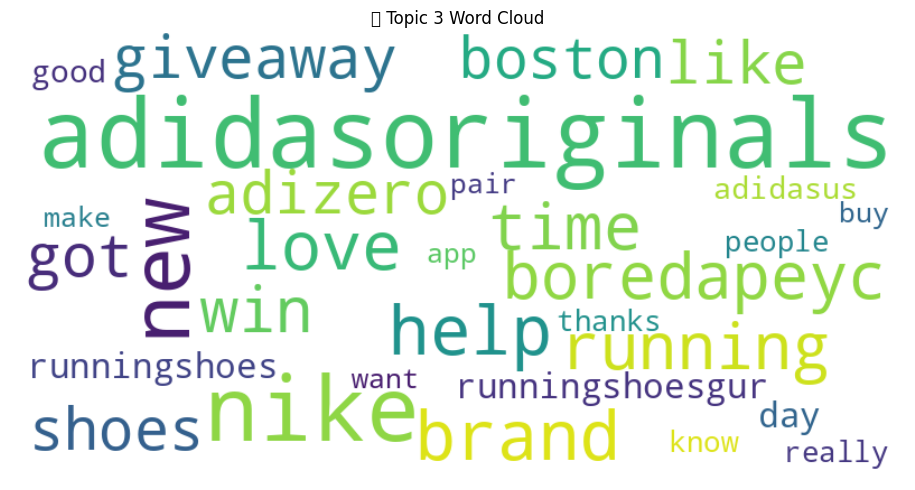

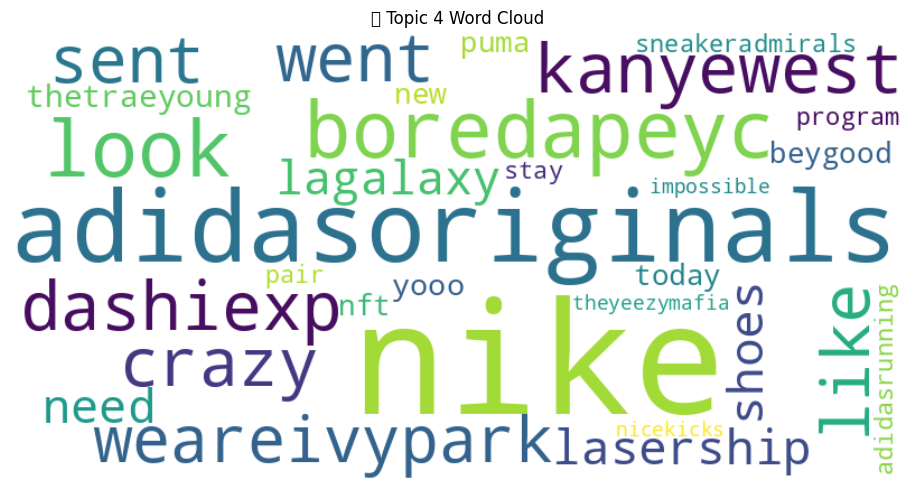

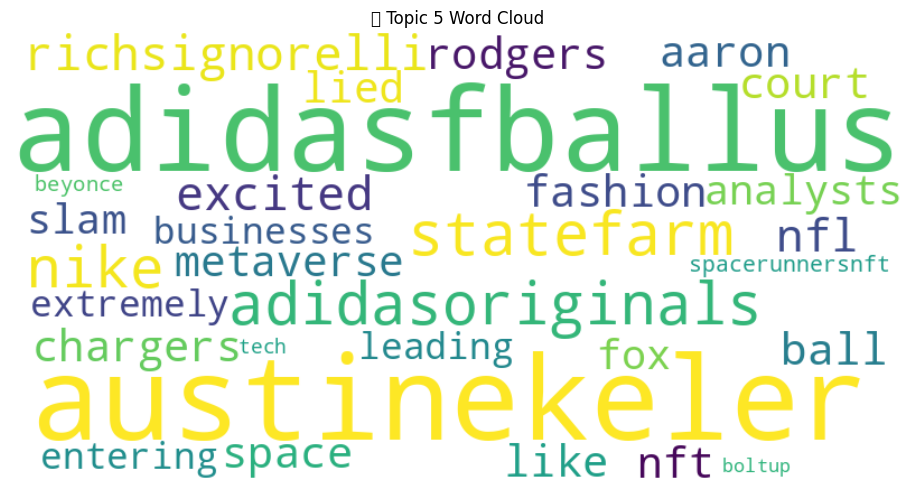

In [67]:
custom_stopwords = {'https', 'rt', 'lululemon', 'adidas'}

# Run LDA
lda_lulu, vec_lulu = run_lda_model(lulu_df, num_topics=5, custom_stopwords=custom_stopwords)
lda_adidas, vec_adidas = run_lda_model(adidas_df, num_topics=5, custom_stopwords=custom_stopwords)

# Visualize Lululemon
plot_topic_words_bar(lda_lulu, vec_lulu)
plot_topic_wordclouds(lda_lulu, vec_lulu)

# Visualize Adidas
plot_topic_words_bar(lda_adidas, vec_adidas)
plot_topic_wordclouds(lda_adidas, vec_adidas)


##Sentiment Analysis

In [68]:
#sentiment analysis using VADER library
def analyze_sentiment(df):
    # Apply VADER to each tweet
    scores = df['cleaned_text'].dropna().apply(analyzer.polarity_scores)

    # Extract compound score (ranges from -1 to +1)
    df['sentiment_score'] = scores.apply(lambda x: x['compound'])

    # Optional: Label sentiment
    df['sentiment_label'] = df['sentiment_score'].apply(
        lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral')
    )

    return df


In [69]:
lulu_df = analyze_sentiment(lulu_df)
adidas_df = analyze_sentiment(adidas_df)


In [70]:
print(" Average Sentiment Scores:")
print("Lululemon:", lulu_df['sentiment_score'].mean())
print("Adidas:", adidas_df['sentiment_score'].mean())


 Average Sentiment Scores:
Lululemon: 0.24063222940226173
Adidas: 0.24419613995603476


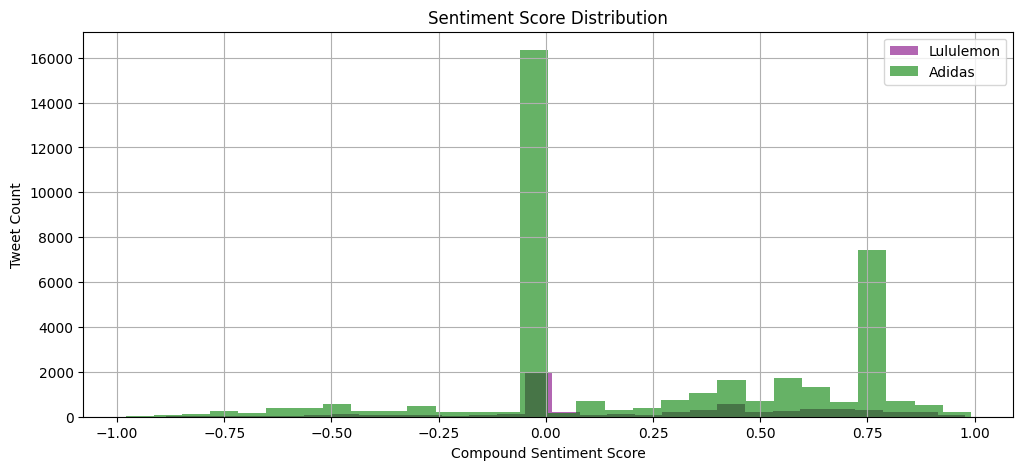

In [71]:
#Figure to display sentiment score
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.hist(lulu_df['sentiment_score'], bins=30, alpha=0.6, label='Lululemon', color='purple')
plt.hist(adidas_df['sentiment_score'], bins=30, alpha=0.6, label='Adidas', color='green')

plt.title("Sentiment Score Distribution")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Tweet Count")
plt.legend()
plt.grid(True)
plt.show()


Further analysis of the sentiment

Sentiment label percentages

In [72]:
def sentiment_distribution(df, brand_name):
    dist = df['sentiment_label'].value_counts(normalize=True) * 100
    print(f"\n Sentiment distribution for {brand_name}:")
    for label in ['positive', 'neutral', 'negative']:
        print(f"{label.capitalize()}: {dist.get(label, 0):.2f}%")


In [73]:
sentiment_distribution(lulu_df, "Lululemon")
sentiment_distribution(adidas_df, "Adidas")



 Sentiment distribution for Lululemon:
Positive: 54.54%
Neutral: 32.65%
Negative: 12.81%

 Sentiment distribution for Adidas:
Positive: 47.66%
Neutral: 42.90%
Negative: 9.44%


Sentiment over time

In [74]:
def plot_sentiment_trend(df, brand_name, color):
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['date'] = df['created_at'].dt.date

    # Group by date and get average sentiment
    daily_sentiment = df.groupby('date')['sentiment_score'].mean()

    plt.plot(daily_sentiment.index, daily_sentiment.values, label=brand_name, linewidth=2, color=color)


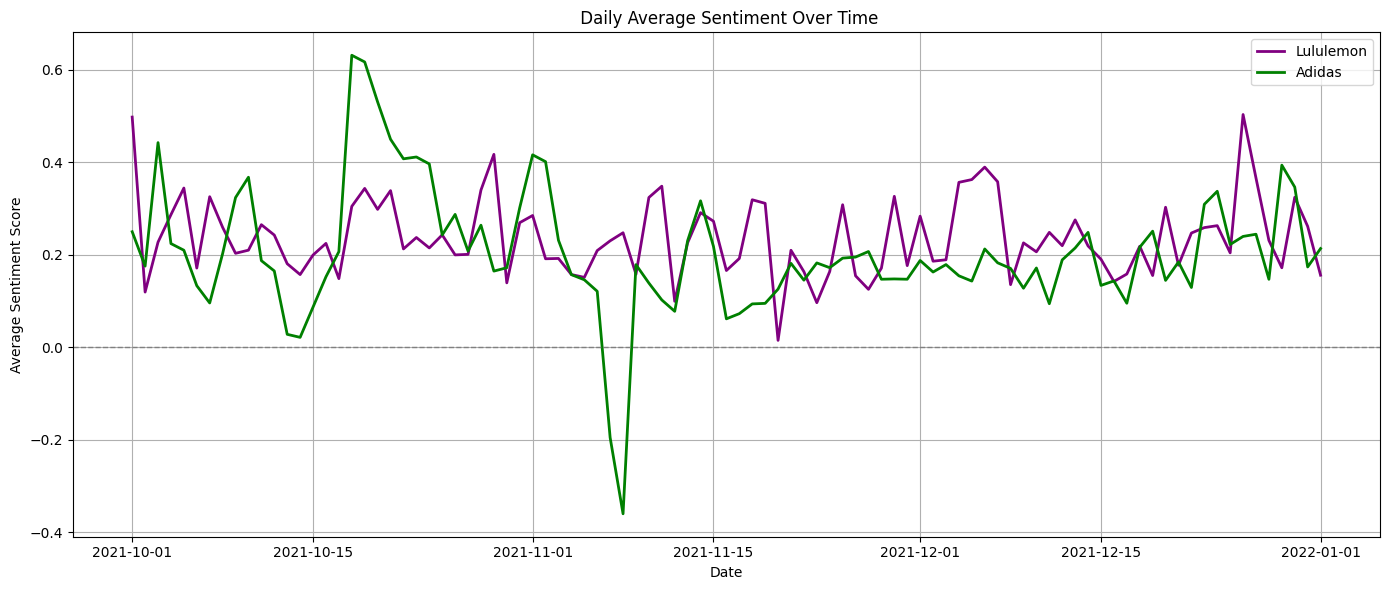

In [75]:
plt.figure(figsize=(14, 6))

plot_sentiment_trend(lulu_df, "Lululemon", "purple")
plot_sentiment_trend(adidas_df, "Adidas", "green")

plt.title(" Daily Average Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.axhline(0, linestyle='--', color='gray', linewidth=1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Lets look into these spikes in Adidas

In [76]:
# Make sure sentiment and date columns exist
adidas_df['created_at'] = pd.to_datetime(adidas_df['created_at'])
adidas_df['date'] = adidas_df['created_at'].dt.date

# Group by date and average sentiment
daily_sentiment = adidas_df.groupby('date')['sentiment_score'].mean()

# Find max and min sentiment days
max_day = daily_sentiment.idxmax()
min_day = daily_sentiment.idxmin()

print(" Most Positive Day:", max_day, "Score:", daily_sentiment[max_day])
print(" Most Negative Day:", min_day, "Score:", daily_sentiment[min_day])


 Most Positive Day: 2021-10-18 Score: 0.6311780336403684
 Most Negative Day: 2021-11-08 Score: -0.3603148471615721


In [77]:
# Get tweets from the most positive day
positive_spike_tweets = adidas_df[adidas_df['date'] == max_day]
print("\n Example tweets from the positive spike day:")
print(positive_spike_tweets[['full_text', 'sentiment_score']].head(5))

# Get tweets from the most negative day
negative_spike_tweets = adidas_df[adidas_df['date'] == min_day]
print("\n Example tweets from the negative spike day:")
print(negative_spike_tweets[['full_text', 'sentiment_score']].head(5))



 Example tweets from the positive spike day:
                                                                                                                                                                                      full_text  \
10703  @erik102079 @FreepMarathon @adidasrunning @freepsports @adidas As you should be. Takes a certain individual to push themselves like you did. I bet them legs are https://t.co/tneCH9enyv   
10704                                                                                                              @erik102079 @FreepMarathon @adidasrunning @freepsports @adidas Congrats man!   
10705                                                                                                                         @LegasusO @FreepMarathon @adidasrunning @freepsports @adidas 😂🤫🙏🏼   
10706                                                                                                     @invertedwAvess @FreepMarathon @adidasrunning @freepsports @adidas T

In [78]:
positive_spike_tweets.sort_values(by='sentiment_score', ascending=False).head(5)
negative_spike_tweets.sort_values(by='sentiment_score').head(5)


created_at                   id  \
22435 2021-11-08 20:43:39+00:00  1457811072837095400   
22461 2021-11-08 22:36:39+00:00  1457839512827146200   
22431 2021-11-08 19:39:57+00:00  1457795042081267700   
22297 2021-11-08 13:45:25+00:00  1457705820502642700   
22290 2021-11-08 13:48:10+00:00  1457706513422684200   

                                                                                                                                                                                                                                                                                                                                                                        full_text  \
22435  @derrycanvasser @richsignorelli @BanksResearcher @StateFarm @adidas @thedailybeast Sadly if there are repercussions, the brunt of it will hit the Packers organization and not Rodgers. Other teams have seen big fines as well as loss of draft picks.  Thats the worst thing to me, he knew that and still did what he wanted. A total FU to the team and his teammates.   
22461                                                                                    Operation @PUMA: End lying Operation AZAZEL ⚫️: End Xmas Operation @ADIDAS: End violence Operation JUDAH 🇵🇸: End [Saxons (right-brain only, Y, no X, males) (dead, desu kuten)]  @NYCSchools @usedgov @LASchools   @DeptofDefense @SpaceForceDoD @USNavy @USMC @USArmy @USCG @usairforce   
22431                                         @richsignorelli @StateFarm @adidas @thedailybeast I'm tired of sports analysis criticizing players & coaches for lying, DUI's, racism, or credibility. The #NFL OWNERS lied about #CTE, doesn't allow #Black owners and the #ArmedForces PAYS the NFL to be Patriotic.KEEP the same energy for the Owners. #AaronRodgers #NFLemails   
22297                                                                                        Let’s block their business, block training, block team bus, block the doors of the megastore, storm the stadium, stop supporting their sponsors, just reply #oleout #glazersout in all their FB/IG/Twitter posts #mufc @TeamViewer @adidas @KohlerUnited @chevrolet @OfficialMauiJim   
22290                                                              @utdreport @RobDawsonESPN Let’s block their business, block training, block team bus, block the doors of the megastore, storm the stadium, stop supporting their sponsors, just reply #oleout #glazersout in all their FB/IG/Twitter posts #mufc @TeamViewer @adidas @KohlerUnited @chevrolet @OfficialMauiJim   

       is_quote_status  retweet_count  favorite_count    user.id  \
22435            False              0               2   41401780   
22461            False              0               0  454029600   
22431            False              0               0   83182214   
22297            False              2               3  406747460   
22290            False              1               2  406747460   

             user.name user.screen_name                 user.location  \
22435             Hans       OrionPrime                     Wisconsin   
22461     Sam Gosei mL        aki_miake  Arlex 🔎🕰, Northen America ☸️   
22431  Melvin Shadrick       MrShadrick                            NA   
22297              Lee    chadsterger87                            NA   
22290              Lee    chadsterger87                            NA   

       user.followers_count  user.friends_count  user.listed_count  \
22435                  5474                5993                  4   
22461                   102                1386                  0   
22431                    57                 148                  1   
22297                     0                 113                  0   
22290                     0                 113                  0   

       user.verified  user.statuses_count  \
22435          False                10854   
22461          False                31367   
22431          False                  875

It seems that the large posiitve spike for Adidas was due to the Adidas marathon event.


The large negative spike was due to a 'scandal' where Adidas sponsored athlete Aaron Rodgers came out as anti-vax, and people were crying in uproar for about a week

##User Analysis

###Top 5 Most Active Users

In [79]:
print(" Top 5 Most Active Users (Lululemon)")
print(lulu_df['user.name'].value_counts().head(5))

print("\n Top 5 Most Active Users (Adidas)")
print(adidas_df['user.name'].value_counts().head(5))


 Top 5 Most Active Users (Lululemon)
user.name
Jim Ace          32
Matt Mulligan    31
Kinseyfit        24
Andrew Ace       23
jacqui B         20
Name: count, dtype: int64

 Top 5 Most Active Users (Adidas)
user.name
La Revelacion            137
AMZ                      127
Le Prinzri 7 STAR        108
Jajuan Michael Harley     89
Traci G                   68
Name: count, dtype: int64


###Top 5 Most Engaged with Users

In [80]:
def top_engaged_users(df, brand_name):
    # Ensure numeric types
    df['retweet_count'] = pd.to_numeric(df['retweet_count'], errors='coerce').fillna(0)
    df['favorite_count'] = pd.to_numeric(df['favorite_count'], errors='coerce').fillna(0)

    # Group by user and sum engagement
    top_users = df.groupby('user.name')[['retweet_count', 'favorite_count']].sum()
    top_users['total_engagement'] = top_users['retweet_count'] + top_users['favorite_count']

    # Sort and return top 5
    top_users = top_users.sort_values(by='total_engagement', ascending=False).head(5)

    print(f"\n Top 5 Engaged Users ({brand_name}) - by Total Retweets + Favorites:")
    return top_users



In [81]:
top_lulu_engaged = top_engaged_users(lulu_df, "Lululemon")
print(top_lulu_engaged)

top_adidas_engaged = top_engaged_users(adidas_df, "Adidas")
print(top_adidas_engaged)



 Top 5 Engaged Users (Lululemon) - by Total Retweets + Favorites:
                            retweet_count  favorite_count  total_engagement
user.name                                                                  
chel                                 1791               0              1791
Nicholas Ferroni                       73            1034              1107
Ryan Clark                              5             770               775
Sarah Thomas Pilcher 🧘🏾‍♀️            773               0               773
DeeZe                                  17             712               729

 Top 5 Engaged Users (Adidas) - by Total Retweets + Favorites:
           retweet_count  favorite_count  total_engagement
user.name                                                 
Nick              233205              22            233227
Chris             213358               9            213367
Daniel            175216               9            175225
Matt              174567               5  

###Top 5 Users by Follower Count (Great for Micro-influencer choice)

In [82]:
def top_followers(df, brand_name):
    # Ensure followers count is numeric
    df['user.followers_count'] = pd.to_numeric(df['user.followers_count'], errors='coerce').fillna(0)

    # Drop duplicate users, keep max followers per user
    top_followed = df[['user.name', 'user.followers_count']].drop_duplicates(subset='user.name')
    top_followed = top_followed.sort_values(by='user.followers_count', ascending=False).head(10)

    print(f"\n Top 10 Users by Followers ({brand_name}):")
    return top_followed



In [83]:
top_lulu_followers = top_followers(lulu_df, "Lululemon")
print(top_lulu_followers)

top_adidas_followers = top_followers(adidas_df, "Adidas")
print(top_adidas_followers)



 Top 10 Users by Followers (Lululemon):
                   user.name  user.followers_count
3982               USA TODAY               4518955
5953                    CNBC               4454674
5617                     WWD               2778644
4673            iJustine.eth               1799479
1518           Yahoo Finance               1276418
71               Golf Digest                945466
371     KHOU 11 News Houston                740638
797                   Adweek                674596
1835  Hockey Night in Canada                643765
257      Nashville Predators                621389

 Top 10 Users by Followers (Adidas):
              user.name  user.followers_count
1383               Xbox              17391389
29082     Marcelotwelve              12258139
19869     Missy Elliott               6930157
1210           DashieXP               5232390
29477     CoinMarketCap               4304580
24911  adidas Originals               4161832
32157            adidas               

###Verified Users with High Engagement

In [84]:
def verified_users_with_reach(df, brand_name):
    # Ensure required columns are the correct types
    df['retweet_count'] = pd.to_numeric(df['retweet_count'], errors='coerce').fillna(0)
    df['favorite_count'] = pd.to_numeric(df['favorite_count'], errors='coerce').fillna(0)
    df['user.followers_count'] = pd.to_numeric(df['user.followers_count'], errors='coerce').fillna(0)
    df['user.verified'] = df['user.verified'].fillna(False).astype(bool)

    # Filter for verified users only
    verified = df[df['user.verified'] == True]

    # Group by user and sum engagement
    verified_summary = verified.groupby('user.name').agg({
        'retweet_count': 'sum',
        'favorite_count': 'sum',
        'user.followers_count': 'max'
    })

    verified_summary['total_engagement'] = (
        verified_summary['retweet_count'] + verified_summary['favorite_count']
    )

    top_verified = verified_summary.sort_values(by='total_engagement', ascending=False).head(5)

    print(f"\n Top Verified Users by Engagement ({brand_name}):")
    return top_verified


In [85]:
top_verified_lulu = verified_users_with_reach(lulu_df, "Lululemon")
print(top_verified_lulu)

top_verified_adidas = verified_users_with_reach(adidas_df, "Adidas")
print(top_verified_adidas)



 Top Verified Users by Engagement (Lululemon):
                        retweet_count  favorite_count  user.followers_count  \
user.name                                                                     
Nicholas Ferroni                   73            1034                 94334   
Ryan Clark                          5             770                265626   
Hockey Night in Canada             39             587                643765   
Rob Benedict                       18             399                536035   
LISA RILEY                          9             401                130066   

                        total_engagement  
user.name                                 
Nicholas Ferroni                    1107  
Ryan Clark                           775  
Hockey Night in Canada               626  
Rob Benedict                         417  
LISA RILEY                           410  

 Top Verified Users by Engagement (Adidas):
                                          retweet_co

In [86]:
# Filter for Jack Patillo
jack_tweets = lulu_df[lulu_df['user.name'] == 'Ryan Clark']

# Display relevant tweet information
jack_tweets[['created_at', 'full_text']]


created_at  \
892  2021-10-16 17:05:14+00:00   
3070 2021-11-13 00:48:12+00:00   
5293 2021-12-19 18:00:12+00:00   
5505 2021-12-22 18:12:53+00:00   
5508 2021-12-22 18:31:30+00:00   

                                                                                                                                                                                                                                                                                      full_text  
892                                                                                                                                                                                                  @alexcorgiat Nope! Tie dye @lululemon with some @OffWht J’s. Just some walking around gear  
3070                           Well guys, forgot my suits at home. I don’t know if these @lululemon sweat suits gonna stunt on @GetUpESPN & @ESPNNFL this is all ya got! So, I don’t wanna hear nothing from @Espngreeny & @danorlovsky7. The first joke is gonna throw the show off the rails.  
5293                                       Every week I unpack my bag, do my laundry; & repack the exact same thing. So if you’ve seen me traveling, yes that’s the same @lululemon sweat suit I had on last week and the previous 12. I bring three & rotate them.. please don’t judge me! 😂😂😂  
5505  Nah fam. No one with options goes with the combed through low Afro, ivory Lee. That’s an old man, I don’t look right with nothing else haircut. You stuck like that jack. I got on a @lululemon sweat suit and @Jumpman23 today. Your head still looks like that. https://t.co/80dD3dG4QI  
5508                                                                                                                                                @GRAITORNATION @lululemon @Jumpman23 Nah not at all… you just got a more permanent Django look than I. Funny to me! I’m just get stuck this

In [87]:
# Filter for user with name 'Stein'
stein_info = adidas_df[adidas_df['user.name'] == 'Stein']

# Display all columns for their tweets
stein_info


created_at                   id  \
1007  2021-10-06 15:15:13+00:00  1445769622221844500   
2550  2021-10-12 16:47:47+00:00  1447967244483367000   
13430 2021-10-18 16:42:32+00:00  1450140251280662500   
18294 2021-10-21 01:22:31+00:00  1450995885303742500   
21778 2021-11-06 23:28:12+00:00  1457127708022820900   
22727 2021-11-09 23:18:54+00:00  1458212533743931400   
34670 2021-12-21 17:25:15+00:00  1473343821270245400   

                                                                                                                                          full_text  \
1007                                                                                                              @aarongreenberg @adidas @Xbox 🔥 👟   
2550                                                                                                                @MilanKLee @Xbox @adidas Nice W   
13430  RT @Xbox: Three icons: @adidas, Xbox, and you.  Follow & RT with #XboxSweepstakes for a chance to win this exclusive kit including the Xbox…   
18294  RT @stockx: Donate to win on 10/21 at 12pm ET.    The @adidas x @Xbox Friends & Family 20th Forum Tech celebrates the console’s 20th annive…   
21778                                                      @MZEROGAMES @adidas @adidasUS @adidasNYC @Xbox @XboxAmbassadors @ID_Xbox @Phasmatis8 🔥🔥🔥   
22727                                                                                                               @brennadactyl @Xbox @adidas 👟 🔥   
34670  RT @Xbox: Next-gen gaming meets next-gen style.  Get the @adidas Xbox Forum Tech Boost: https://t.co/GJ18yg1MBz  #Xbox20 https://t.co/mrUta…   

       is_quote_status  retweet_count  favorite_count   user.id user.name  \
1007             False              0              20  13370082     Stein   
2550             False              0               0  13370082     Stein   
13430            False          19396               0  13370082     Stein   
18294            False            124               0  13370082     Stein   
21778            False              0               2  13370082     Stein   
22727            False              0               6  13370082     Stein   
34670            False            257               0  13370082     Stein   

      user.screen_name user.location  user.followers_count  \
1007         steinekin             🎮                 41724   
2550         steinekin             🎮                 41725   
13430        steinekin             🎮                 41724   
18294        steinekin             🎮                 41724   
21778        steinekin             🎮                 41724   
22727        steinekin             🎮                 41724   
34670        steinekin             🎮                 41724   

       user.friends_count  user.listed_count  user.verified  \
1007                 2186                344           True   
2550                 2186                344           True   
13430                2186                344           True   
18294                2186                344           True   
21778                2186                344           True   
22727                2186                344           True   
34670                2186                344           True   

       user.statuses_count  \
1007                120280   
2550                120280   
13430               120280   
18294               120280   
21778               120280   
22727               120280   
34670               120280   

                                                                                       cleaned_text  \
1007                                                                     aarongreenberg adidas Xbox   
2550                                                                   MilanKLee Xbox adidas Nice W   
13430  RT Xbox Three icons adidas Xbox Follow RT XboxSweepstakes chance win exclusive kit including   
18294            RT stockx Donate win ET adidas x Xbox Friends Family Forum Tech celebrates

##Geospatial Analysis

First, we must clean up the user.location column as it contains loads of NA values, and a bunch of junk locations that aren't real or useful

In [88]:
def clean_location_column(df):
    # Remove nulls and standardize format
    df = df.copy()
    df = df[df['user.location'].notnull()]
    df['user.location'] = df['user.location'].str.lower().str.strip()

    # Remove known junk entries
    junk_locations = {
        'earth', 'here', 'everywhere', 'the moon', 'your mom', 'in your head',
        'on mars', 'somewhere', 'worldwide', 'wherever', 'na', 'n/a'
    }
    df = df[~df['user.location'].isin(junk_locations)]

    return df


In [89]:
# Clean and preview
lulu_geo = clean_location_column(lulu_df)
adidas_geo = clean_location_column(adidas_df)

print(" Top Lululemon Locations:")
print(lulu_geo['user.location'].value_counts().head(10))

print("\n Top Adidas Locations:")
print(adidas_geo['user.location'].value_counts().head(10))


 Top Lululemon Locations:
user.location
united states        154
new york, ny         105
chicago, il          101
los angeles, ca       77
california, usa       61
san francisco, ca     45
dallas, tx            44
atlanta, ga           40
usa                   40
new york              39
Name: count, dtype: int64

 Top Adidas Locations:
user.location
united states      1153
california, usa     465
chicago, il         437
miami, fl           404
los angeles, ca     398
new york, ny        369
usa                 358
new york, usa       291
florida, usa        253
los angeles         233
Name: count, dtype: int64


Most of the entries are coming from the US and are state level, but there are some other countries making an impact. We will do 2 heatmaps, one for just the US at the state level, and then one for the world on a country level.

##Heatmaps

In [90]:

# Basic mapping of common city/state patterns to state codes since the user.location column contains lots of different ways to describe locations
state_patterns = {
    'ny': 'NY', 'new york': 'NY',
    'ca': 'CA', 'california': 'CA', 'los angeles': 'CA', 'san francisco': 'CA',
    'il': 'IL', 'chicago': 'IL',
    'tx': 'TX', 'dallas': 'TX', 'houston': 'TX',
    'ga': 'GA', 'atlanta': 'GA',
    'fl': 'FL', 'miami': 'FL', 'florida': 'FL',
    'pa': 'PA', 'philadelphia': 'PA',
    'dc': 'DC', 'washington, dc': 'DC',
    'wa': 'WA', 'seattle': 'WA',
    'ma': 'MA', 'boston': 'MA',
    'oh': 'OH', 'cleveland': 'OH',
    'usa': 'US', 'united states': 'US'
}

def extract_us_state(location):
    location = location.lower()
    for pattern, state_code in state_patterns.items():
        if pattern in location:
            return state_code
    return None


In [91]:
# Apply function
lulu_geo['state'] = lulu_geo['user.location'].apply(extract_us_state)
adidas_geo['state'] = adidas_geo['user.location'].apply(extract_us_state)

# Count tweets per state
lulu_state_counts = lulu_geo['state'].value_counts()
adidas_state_counts = adidas_geo['state'].value_counts()


In [92]:


def plot_us_choropleth(state_counts, brand_name):
    # Prepare DataFrame
    df = state_counts.reset_index()
    df.columns = ['state', 'tweet_count']
    df = df[df['state'].isin([
        'AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA',
        'KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ',
        'NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT',
        'VA','WA','WV','WI','WY','DC'
    ])]  # filter valid state codes

    fig = px.choropleth(
        df,
        locations='state',
        locationmode="USA-states",
        color='tweet_count',
        scope="usa",
        color_continuous_scale="Blues",
        title=f"{brand_name} Tweet Volume by U.S. State"
    )
    fig.show()


In [93]:
plot_us_choropleth(lulu_state_counts, "Lululemon")
plot_us_choropleth(adidas_state_counts, "Adidas")


Bar chart as well, for quick and easy comparison

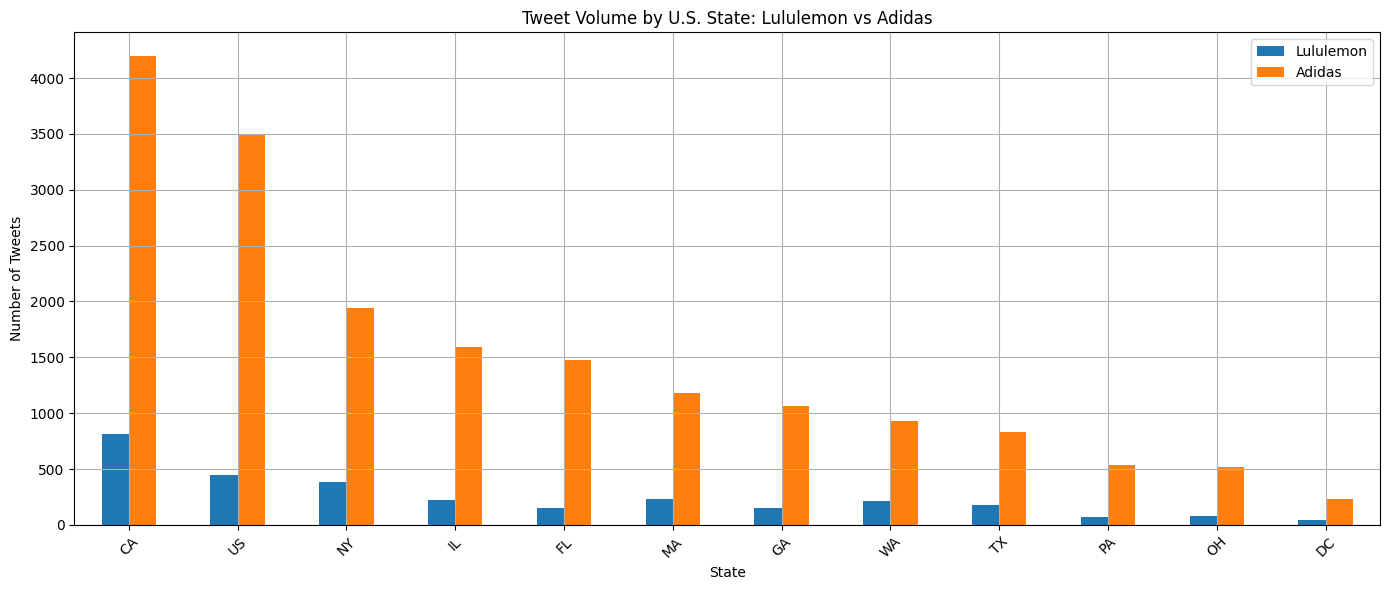

In [94]:

# Combine counts into a single DataFrame
combined_counts = pd.DataFrame({
    'Lululemon': lulu_state_counts,
    'Adidas': adidas_state_counts
}).fillna(0)

# Sort by total tweet count
combined_counts['Total'] = combined_counts['Lululemon'] + combined_counts['Adidas']
combined_counts = combined_counts.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plot side-by-side bar chart
combined_counts.plot(kind='bar', figsize=(14, 6))
plt.title("Tweet Volume by U.S. State: Lululemon vs Adidas")
plt.ylabel("Number of Tweets")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


Global Heatmap

In [95]:
#country key-word matching function

# Build a list of real country names in lowercase
country_list = [country.name.lower() for country in pycountry.countries]

def extract_country(location):
    if pd.isnull(location):
        return None
    location = location.lower()
    for country in country_list:
        if country in location:
            return country.title()
    return None


In [96]:
# Apply to cleaned location DataFrames
lulu_geo['country'] = lulu_geo['user.location'].apply(extract_country)
adidas_geo['country'] = adidas_geo['user.location'].apply(extract_country)

# Count tweets by country
lulu_country_counts = lulu_geo['country'].value_counts().reset_index()
lulu_country_counts.columns = ['country', 'tweet_count']

adidas_country_counts = adidas_geo['country'].value_counts().reset_index()
adidas_country_counts.columns = ['country', 'tweet_count']


In [97]:
def plot_world_map(df, brand_name):
    fig = px.choropleth(
        df,
        locations='country',
        locationmode='country names',
        color='tweet_count',
        title=f"{brand_name} Tweet Volume by Country",
        color_continuous_scale='Viridis'
    )
    fig.update_geos(showframe=False, showcoastlines=False)
    fig.show()


In [98]:
plot_world_map(lulu_country_counts, "Lululemon")
plot_world_map(adidas_country_counts, "Adidas")


#Additional Visualizations

Topic vs. Sentiment

In [99]:
#Here we are creating a graph that plots the sentiment of each topic created in our LDA analysis. Each topic should get a sentiment score

def assign_topics(df, num_topics=5, custom_stopwords=None):
    if custom_stopwords is None:
        custom_stopwords = set()

    from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
    stopwords = set(ENGLISH_STOP_WORDS).union(custom_stopwords)

    texts = df['cleaned_text'].dropna().str.lower().tolist()
    vectorizer = CountVectorizer(stop_words=list(stopwords))
    X = vectorizer.fit_transform(texts)

    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    topic_distributions = lda.fit_transform(X)

    # Assign dominant topic to each tweet
    topic_labels = topic_distributions.argmax(axis=1)

    # Return LDA model, vectorizer, and topic assignments
    return lda, vectorizer, topic_labels


In [100]:
custom_stopwords = {'https', 'rt', 'lululemon', 'adidas'}

lda_lulu, vec_lulu, topics_lulu = assign_topics(lulu_df, num_topics=5, custom_stopwords=custom_stopwords)
lda_adidas, vec_adidas, topics_adidas = assign_topics(adidas_df, num_topics=5, custom_stopwords=custom_stopwords)

# Add topic labels to DataFrames
lulu_df['topic'] = topics_lulu
adidas_df['topic'] = topics_adidas


In [101]:
# Average sentiment by topic
lulu_topic_sentiment = lulu_df.groupby('topic')['sentiment_score'].agg(['mean', 'count']).reset_index()
adidas_topic_sentiment = adidas_df.groupby('topic')['sentiment_score'].agg(['mean', 'count']).reset_index()


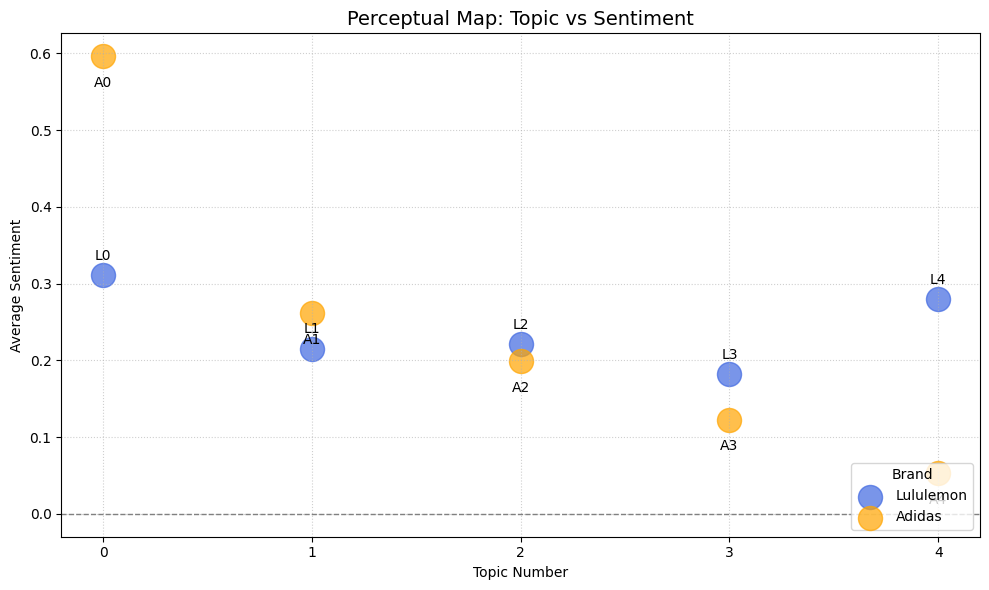

In [102]:

plt.figure(figsize=(10, 6))

# Plot each brand with fixed-size markers
plt.scatter(lulu_topic_sentiment['topic'], lulu_topic_sentiment['mean'],
            s=300, color='royalblue', label='Lululemon', alpha=0.7)

plt.scatter(adidas_topic_sentiment['topic'], adidas_topic_sentiment['mean'],
            s=300, color='orange', label='Adidas', alpha=0.7)

# Add topic labels (clean and centered)
for _, row in lulu_topic_sentiment.iterrows():
    plt.text(row['topic'], row['mean'] + 0.02, f"L{int(row['topic'])}", ha='center', fontsize=10)

for _, row in adidas_topic_sentiment.iterrows():
    plt.text(row['topic'], row['mean'] - 0.04, f"A{int(row['topic'])}", ha='center', fontsize=10)

# Title and axis formatting
plt.title("Perceptual Map: Topic vs Sentiment", fontsize=14)
plt.xlabel("Topic Number")
plt.ylabel("Average Sentiment")
plt.xticks(ticks=range(5))  # Show only whole topic numbers (0–4)
plt.axhline(0, linestyle='--', color='gray', linewidth=1)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(title="Brand", loc='lower right')
plt.tight_layout()
plt.show()

